#Imports


In [ ]:
!pip install pmdarima

In [ ]:
!pip install pandas-profiling

In [ ]:
!pip install dtale

In [ ]:
pip install cmake

In [ ]:
pip install pystan

In [ ]:
pip install wheel setuptools

In [ ]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
ERROR: Could not build wheels for fbprophet, which is required to install pyproject.toml-based projects


In [ ]:
from prophet import  Prophet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.ar_model import AR,ARResults
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from sklearn.pipeline import Pipeline
from pandas_profiling import ProfileReport


import warnings
warnings.filterwarnings('ignore')



#Loading data

In [ ]:
df = pd.read_excel('/content/Men Athletic Wear.xlsx')

In [ ]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Sales Method,Units Sold,Total Sales,Operating Profit,Operating Margin
0,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,In-store,1000,500000,150000,0.3
1,Foot Locker,1185732,2020-01-08,Northeast,New York,New York,Men's Athletic Footwear,50,Outlet,900,450000,135000,0.3
2,Foot Locker,1185732,2020-01-26,Northeast,New York,New York,Men's Athletic Footwear,50,Outlet,925,462500,138750,0.3
3,Foot Locker,1185732,2020-02-01,Northeast,New York,New York,Men's Athletic Footwear,50,Outlet,900,450000,135000,0.3
4,Foot Locker,1185732,2020-02-07,Northeast,New York,New York,Men's Athletic Footwear,55,Outlet,925,508750,152625,0.3


#Business Goal

To build a model that can predict sales of Adidas product provided the range of dates

#Data Preprocessing

Removing delimiters

In [ ]:
# df = df.replace(',', '', regex = True)
# df['Price per Unit'] = str(df['Price per Unit'])
# df['Operating Profit'] = str(df['Operating Profit'])
# df['Units Sold'] = str(df['Units Sold'])
# df['Total Sales'] = str(df['Total Sales'])
# df['Price per Unit'] = df['Price per Unit'].str.replace('$', '')
# df['Operating Profit'] = df['Operating Profit'].str.replace('$', '')
# df['Units Sold'] = df['Units Sold'].str.replace('$', '')
# df['Total Sales'] = df['Total Sales'].str.replace('$', '')



Handling categorical values

In [ ]:
columns_to_encode = ['Region', 'State', 'City', 'Product', 'Sales Method']
encoded_df = pd.get_dummies(df, columns=columns_to_encode)
print(list(encoded_df))

['Retailer', 'Retailer ID', 'Invoice Date', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_West', 'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island', 'State_South Carolina', 'State_South Dakota', 'State_Tennessee', '

In [ ]:
print(list(encoded_df))

['Retailer', 'Retailer ID', 'Invoice Date', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_West', 'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island', 'State_South Carolina', 'State_South Dakota', 'State_Tennessee', '

Converting dataframe to time stamped dataframe

In [ ]:
encoded_df.set_index('Invoice Date', inplace = True)

In [ ]:
encoded_df.index = pd.to_datetime(encoded_df.index)

In [ ]:
encoded_df.sort_index(inplace = True)

In [ ]:
encoded_df

,Retailer,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,Foot Locker,1185732,50,1000,500000,150000,0.30,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2020-01-02,Foot Locker,1185732,47,260,12220,5132,0.42,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-02,Foot Locker,1185732,36,320,11520,4032,0.35,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2020-01-03,West Gear,1128299,44,117,5148,1905,0.37,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-03,West Gear,1128299,45,450,202500,50625,0.25,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,Amazon,1185732,46,70,3220,1513,0.47,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2021-12-28,Foot Locker,1185732,60,275,165000,57750,0.35,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2021-12-28,Amazon,1185732,50,250,125000,43750,0.35,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
encoded_df = encoded_df.dropna()

#Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          1610 non-null   object        
 1   Retailer ID       1610 non-null   int64         
 2   Invoice Date      1610 non-null   datetime64[ns]
 3   Region            1610 non-null   object        
 4   State             1610 non-null   object        
 5   City              1610 non-null   object        
 6   Product           1610 non-null   object        
 7   Price per Unit    1610 non-null   int64         
 8   Sales Method      1610 non-null   object        
 9   Units Sold        1610 non-null   int64         
 10  Total Sales       1610 non-null   int64         
 11  Operating Profit  1610 non-null   int64         
 12  Operating Margin  1610 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 163.6+ KB


In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1610 entries, 2020-01-02 to 2021-12-28
Columns: 118 entries, Retailer to Sales Method_Outlet
dtypes: float64(1), int64(5), object(1), uint8(111)
memory usage: 275.1+ KB


In [ ]:
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,1.610000e+03,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1.173861e+06,43.779503,270.513043,95449.490683,32203.083230,0.402702
std,2.635159e+04,13.083057,216.708762,142842.516444,47051.703664,0.082307
min,1.128299e+06,11.000000,23.000000,736.000000,331.000000,0.150000
25%,1.185732e+06,35.000000,111.000000,4347.000000,1944.250000,0.350000
50%,1.185732e+06,44.000000,200.000000,10025.500000,4184.000000,0.400000
75%,1.185732e+06,51.000000,350.000000,150000.000000,51188.000000,0.470000
max,1.197831e+06,95.000000,1025.000000,712500.000000,285000.000000,0.650000


In [ ]:
encoded_df.dtypes

Retailer                           object
Retailer ID                         int64
Price per Unit                      int64
Units Sold                          int64
Total Sales                         int64
                                    ...  
City_Wilmington                     uint8
Product_Men's Athletic Footwear     uint8
Sales Method_In-store               uint8
Sales Method_Online                 uint8
Sales Method_Outlet                 uint8
Length: 118, dtype: object

Missing Values

In [ ]:
encoded_df.isnull().sum()

Retailer                           0
Retailer ID                        0
Price per Unit                     0
Units Sold                         0
Total Sales                        0
                                  ..
City_Wilmington                    0
Product_Men's Athletic Footwear    0
Sales Method_In-store              0
Sales Method_Online                0
Sales Method_Outlet                0
Length: 118, dtype: int64

In [ ]:
encoded_df.dropna(inplace=True)

In [ ]:
city_names = df.City.value_counts().index

In [ ]:
city_names

Index(['Portland', 'Charleston', 'Orlando', 'Salt Lake City', 'Houston',
       'Boise', 'Phoenix', 'Albuquerque', 'Atlanta', 'New York', 'Jackson',
       'Little Rock', 'Oklahoma City', 'Hartford', 'Providence', 'Boston',
       'Burlington', 'Richmond', 'New Orleans', 'Manchester', 'Birmingham',
       'Las Vegas', 'Knoxville', 'Dallas', 'Philadelphia', 'Los Angeles',
       'San Francisco', 'Anchorage', 'Chicago', 'Wichita', 'Wilmington',
       'Baltimore', 'Indianapolis', 'Milwaukee', 'Des Moines', 'Fargo',
       'Sioux Falls', 'Newark', 'Honolulu', 'Albany', 'Louisville', 'Columbus',
       'Charlotte', 'Seattle', 'Miami', 'Minneapolis', 'Billings', 'Omaha',
       'St. Louis', 'Detroit', 'Cheyenne', 'Denver'],
      dtype='object')

In [ ]:
city_values = df.City.value_counts().values

In [ ]:
city_values

array([60, 48, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 26, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24])

In [ ]:
region_names = df.Region.value_counts().index

<Figure size 1000x1000 with 0 Axes>

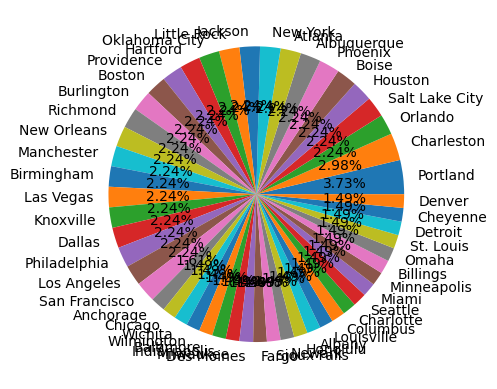

<Figure size 1000x1000 with 0 Axes>

In [ ]:
plt.pie(city_values,labels = city_names,autopct = '%1.2f%%')
plt.figure(figsize=(10, 10))

In [ ]:
corr=df.corr()
corr

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Retailer ID,1.000000,-0.489368,-0.061758,-0.136174,-0.079228,0.232059
Price per Unit,-0.489368,1.000000,0.331020,0.468262,0.433909,-0.218958
Units Sold,-0.061758,0.331020,1.000000,0.924383,0.908900,-0.519169
Total Sales,-0.136174,0.468262,0.924383,1.000000,0.964721,-0.530623
Operating Profit,-0.079228,0.433909,0.908900,0.964721,1.000000,-0.422686
Operating Margin,0.232059,-0.218958,-0.519169,-0.530623,-0.422686,1.000000


In [ ]:
df['Units Sold'] = df['Units Sold'].astype(int)
df['Total Sales'] = df['Total Sales'].astype(int)
df['Operating Profit'] = df['Operating Profit'].astype(int)

<Axes: >

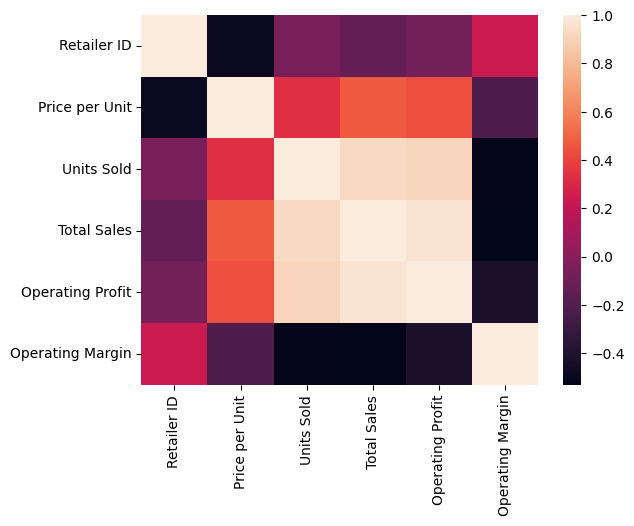

In [ ]:
sns.heatmap(df.corr())

#Automated EDA

In [ ]:
encoded_df

,Retailer,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,Foot Locker,1185732,50,1000,500000,150000,0.30,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2020-01-02,Foot Locker,1185732,47,260,12220,5132,0.42,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-02,Foot Locker,1185732,36,320,11520,4032,0.35,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2020-01-03,West Gear,1128299,44,117,5148,1905,0.37,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-03,West Gear,1128299,45,450,202500,50625,0.25,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,Amazon,1185732,46,70,3220,1513,0.47,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2021-12-28,Foot Locker,1185732,60,275,165000,57750,0.35,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2021-12-28,Amazon,1185732,50,250,125000,43750,0.35,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
report = ProfileReport(df, title = "Pandas Profiling Report", explorative = True)
report.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import dtale
import dtale.app as dtale_app
dtale.app.USE_COLAB = True

In [ ]:
dtale.show(df)

https://upmt4pot50q-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/2

In [ ]:
encoded_df

,Retailer,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,Foot Locker,1185732,50,1000,500000,150000,0.30,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2020-01-02,Foot Locker,1185732,47,260,12220,5132,0.42,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-02,Foot Locker,1185732,36,320,11520,4032,0.35,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2020-01-03,West Gear,1128299,44,117,5148,1905,0.37,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-03,West Gear,1128299,45,450,202500,50625,0.25,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-28,Amazon,1185732,46,70,3220,1513,0.47,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2021-12-28,Foot Locker,1185732,60,275,165000,57750,0.35,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2021-12-28,Amazon,1185732,50,250,125000,43750,0.35,0,1,0,...,0,0,0,0,0,0,1,0,0,1


#Stationarity Check

In [ ]:
encoded_df = encoded_df.resample(rule = 'W').mean()

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
len(encoded_df)

105

In [ ]:
adf_test(encoded_df['Total Sales'][:80])

Augmented Dickey-Fuller Test: 
ADF test statistic      -3.248282
p-value                  0.017355
# lags used              0.000000
# observations          79.000000
critical value (1%)     -3.515977
critical value (5%)     -2.898886
critical value (10%)    -2.586694
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


#Seasonal Decomposition

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
encoded_df.dropna(inplace = True)

In [ ]:
encoded_df

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,1.157016e+06,42.833333,380.333333,122685.500000,35526.500000,0.333333,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000
2020-01-12,1.157016e+06,43.000000,362.333333,112686.666667,32654.166667,0.338333,0.000000,0.500000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2020-01-19,1.128299e+06,49.000000,214.666667,77069.333333,19689.000000,0.323333,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2020-01-26,1.157016e+06,51.000000,344.500000,120852.833333,34815.000000,0.335000,0.000000,0.500000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2020-02-02,1.147443e+06,53.111111,330.000000,124492.777778,37824.666667,0.354444,0.000000,0.333333,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-05,1.187867e+06,51.588235,308.647059,130124.823529,47916.411765,0.425882,0.235294,0.352941,0.000000,0.235294,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.176471,0.588235,0.235294
2021-12-12,1.177763e+06,50.090909,272.515152,113889.757576,38099.939394,0.406061,0.303030,0.393939,0.000000,0.090909,...,0.0,0.0,0.060606,0.000000,0.060606,0.000000,1.0,0.242424,0.545455,0.212121
2021-12-19,1.177732e+06,54.294118,275.852941,119923.676471,42075.470588,0.401471,0.117647,0.441176,0.352941,0.088235,...,0.0,0.0,0.000000,0.058824,0.000000,0.058824,1.0,0.176471,0.500000,0.323529


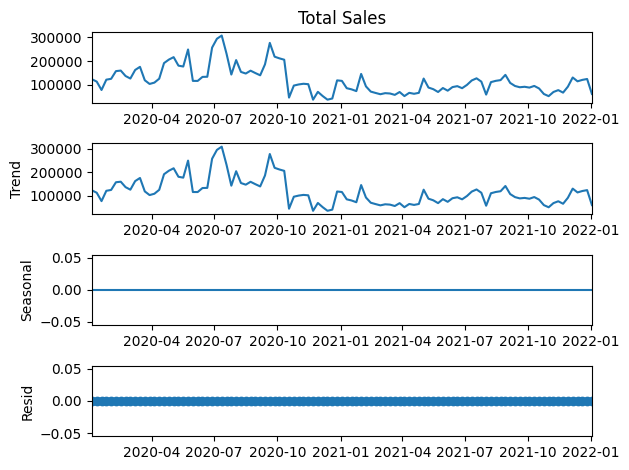

In [ ]:
result = seasonal_decompose(encoded_df['Total Sales'], model = 'additive',period = 1)
result.plot();

#SMA

In [ ]:
encoded_df['2-week-SMA'] = encoded_df['Total Sales'].rolling(window = 2).mean()
encoded_df['3-week-SMA'] = encoded_df['Total Sales'].rolling(window = 3).mean()

In [ ]:
encoded_df['2-week-SMA']

Invoice Date
2020-01-05              NaN
2020-01-12    117686.083333
2020-01-19     94878.000000
2020-01-26     98961.083333
2020-02-02    122672.805556
                  ...      
2021-12-05    110671.036765
2021-12-12    122007.290553
2021-12-19    116906.717023
2021-12-26    121834.425192
2022-01-02     91973.586957
Freq: W-SUN, Name: 2-week-SMA, Length: 105, dtype: float64

In [ ]:
encoded_df['3-week-SMA']

Invoice Date
2020-01-05              NaN
2020-01-12              NaN
2020-01-19    104147.166667
2020-01-26    103536.277778
2020-02-02    107471.648148
                  ...      
2021-12-05     95748.824510
2021-12-12    111743.943702
2021-12-19    121312.752525
2021-12-26    119186.202653
2022-01-02    101290.283461
Freq: W-SUN, Name: 3-week-SMA, Length: 105, dtype: float64

<Axes: xlabel='Invoice Date'>

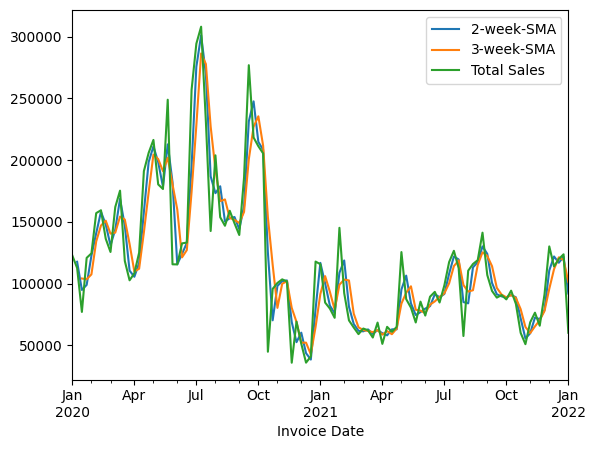

In [ ]:
encoded_df['2-week-SMA'].plot(legend = True)
encoded_df['3-week-SMA'].plot(legend = True)
encoded_df['Total Sales'].plot(legend = True)

In [ ]:
encoded_df['6-week-SMA'] = encoded_df['Total Sales'].rolling(window = 6).mean()
encoded_df['12-week-SMA'] = encoded_df['Total Sales'].rolling(window = 12).mean()

<Axes: xlabel='Invoice Date'>

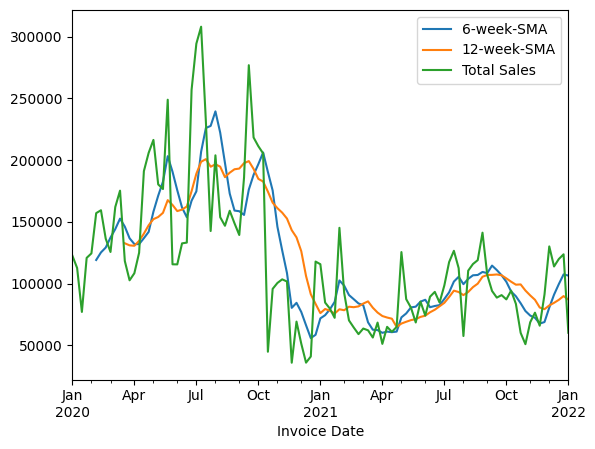

In [ ]:
encoded_df['6-week-SMA'].plot(legend = True)
encoded_df['12-week-SMA'].plot(legend = True)
encoded_df['Total Sales'].plot(legend = True)

#EWMA

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.


The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.

Now the question is, how to we define the weight term $w_i$?

This depends on the <tt>adjust</tt> parameter you provide to the <tt>.ewm()</tt> method.

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

which gives

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

In [ ]:
encoded_df['EWMA'] = encoded_df['Total Sales'].ewm(span = 2).mean()

In [ ]:
encoded_df['EWMA']

Invoice Date
2020-01-05    122685.500000
2020-01-12    115186.375000
2020-01-19     88797.653846
2020-01-26    110434.900000
2020-02-02    119845.545455
                  ...      
2021-12-05    114589.618354
2021-12-12    114123.044502
2021-12-19    117990.132481
2021-12-26    121826.826769
2022-01-02     80743.608923
Freq: W-SUN, Name: EWMA, Length: 105, dtype: float64

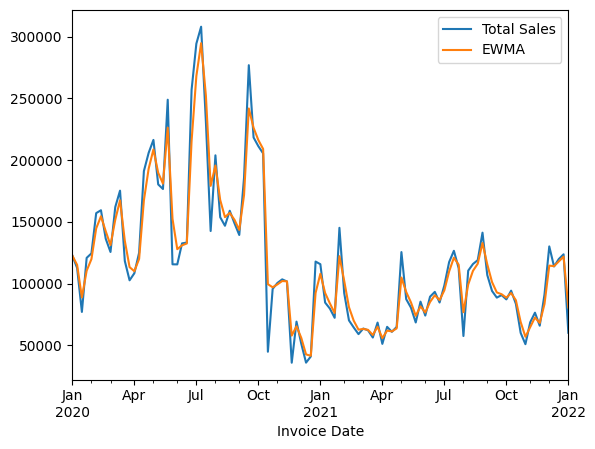

In [ ]:
encoded_df['Total Sales'].plot(legend = True);
encoded_df['EWMA'].plot(legend = True);

#Evaluation Metrics

SMA

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mean_absolute_error(encoded_df['Total Sales'][2:],encoded_df['3-week-SMA'][2:])

19181.92727360646

In [ ]:
mean_squared_error(encoded_df['Total Sales'][2:],encoded_df['3-week-SMA'][2:])

779200967.3334985

In [ ]:
np.sqrt(mean_squared_error(encoded_df['Total Sales'][2:],encoded_df['3-week-SMA'][2:]))

27914.171442718813

In [ ]:
mean_absolute_error(encoded_df['Total Sales'][1:],encoded_df['2-week-SMA'][1:])

13124.487265706399

In [ ]:
mean_squared_error(encoded_df['Total Sales'][1:],encoded_df['2-week-SMA'][1:])

394532179.789174

In [ ]:
np.sqrt(mean_squared_error(encoded_df['Total Sales'][1:],encoded_df['2-week-SMA'][1:]))

19862.834132851585

EWMA Evaluation

In [ ]:
len(encoded_df)

105

In [ ]:
train_data = encoded_df[:90]
test_data = encoded_df[90:]

In [ ]:
test_data

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,...,City_Wilmington,Product_Men's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,2-week-SMA,3-week-SMA,6-week-SMA,12-week-SMA,EWMA
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2021-09-26,1.164575e+06,45.428571,267.904762,90693.142857,35093.714286,0.442857,0.000000,0.095238,0.285714,0.238095,...,0.000000,1.0,0.142857,0.476190,0.380952,89678.943522,91141.719923,106778.732316,106762.737734,91414.877558
2021-10-03,1.176668e+06,37.545455,300.909091,87228.272727,36041.727273,0.473636,0.181818,0.000000,0.545455,0.000000,...,0.000000,1.0,0.090909,0.454545,0.454545,88960.707792,88862.053257,101479.782400,104245.489628,88623.807671
2021-10-10,1.185539e+06,43.032258,275.419355,94299.161290,35210.258065,0.428065,0.193548,0.322581,0.193548,0.129032,...,0.000000,1.0,0.225806,0.516129,0.258065,90763.717009,90740.192292,93652.170393,101554.750464,92407.376751
2021-10-17,1.175486e+06,40.804878,260.487805,83611.414634,30539.414634,0.418049,0.195122,0.243902,0.292683,0.146341,...,0.048780,1.0,0.195122,0.512195,0.292683,88955.287962,88379.616217,89760.668070,99143.637795,86543.402006
2021-10-24,1.173390e+06,39.611111,201.694444,60107.916667,21905.583333,0.415000,0.055556,0.250000,0.333333,0.138889,...,0.000000,1.0,0.111111,0.527778,0.361111,71859.665650,79339.497530,84100.775394,99355.589184,68919.745113
2021-10-31,1.168502e+06,42.000000,150.000000,50948.600000,19605.700000,0.425000,0.000000,0.700000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.500000,0.500000,55528.258333,64889.310434,77814.751363,94395.251363,56938.981704
2021-11-07,1.187244e+06,41.166667,220.916667,68676.083333,25148.000000,0.422083,0.166667,0.541667,0.000000,0.166667,...,0.000000,1.0,0.208333,0.541667,0.250000,59812.341667,59910.866667,74145.241442,90461.986879,64763.716124
2021-11-14,1.178219e+06,41.971429,225.657143,76459.000000,25671.828571,0.400857,0.285714,0.428571,0.000000,0.085714,...,0.057143,1.0,0.228571,0.542857,0.228571,72567.541667,65361.227778,72350.362654,86915.072527,72560.572041
2021-11-21,1.177960e+06,38.942857,217.400000,65904.400000,23203.200000,0.410286,0.114286,0.400000,0.342857,0.085714,...,0.000000,1.0,0.142857,0.514286,0.342857,71181.700000,70346.494444,67617.902439,80635.036416,68123.124014


In [ ]:
encoded_df['EWMA']

Invoice Date
2020-01-05    122685.500000
2020-01-12    115186.375000
2020-01-19     88797.653846
2020-01-26    110434.900000
2020-02-02    119845.545455
                  ...      
2021-12-05    114589.618354
2021-12-12    114123.044502
2021-12-19    117990.132481
2021-12-26    121826.826769
2022-01-02     80743.608923
Freq: W-SUN, Name: EWMA, Length: 105, dtype: float64

In [ ]:
mean_absolute_error(test_data['Total Sales'][:6],encoded_df['EWMA']['2021-09-26':'2021-11-01'])

3623.8752845740623

In [ ]:
mean_squared_error(test_data['Total Sales'][:6],encoded_df['EWMA']['2021-09-26':'2021-11-01'])

21362801.83138688

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:6],encoded_df['EWMA']['2021-09-26':'2021-11-01']))

4621.991111132395

In [ ]:
encoded_df['Total Sales'].mean()

118063.5104528454

#Holt Winters Method

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
span = 2
alpha = 2 / (span + 1)

In [ ]:
encoded_df['EWMA'] = encoded_df['Total Sales'].ewm(alpha = alpha, adjust = False).mean()

In [ ]:
encoded_df['EWMA']

Invoice Date
2020-01-05    122685.500000
2020-01-12    116019.611111
2020-01-19     90052.759259
2020-01-26    110586.141975
2020-02-02    119857.232510
                  ...      
2021-12-05    114589.618354
2021-12-12    114123.044502
2021-12-19    117990.132481
2021-12-26    121826.826769
2022-01-02     80743.608923
Freq: W-SUN, Name: EWMA, Length: 105, dtype: float64

In [ ]:
model = SimpleExpSmoothing(encoded_df['Total Sales'])

In [ ]:
encoded_df['Total Sales']

Invoice Date
2020-01-05    122685.500000
2020-01-12    112686.666667
2020-01-19     77069.333333
2020-01-26    120852.833333
2020-02-02    124492.777778
                  ...      
2021-12-05    130124.823529
2021-12-12    113889.757576
2021-12-19    119923.676471
2021-12-26    123745.173913
2022-01-02     60202.000000
Freq: W-SUN, Name: Total Sales, Length: 105, dtype: float64

In [ ]:
fitted_model = model.fit(smoothing_level = alpha, optimized = False)

In [ ]:
encoded_df['SES7'] = fitted_model.fittedvalues.shift(-1)

In [ ]:
encoded_df['SES7']

Invoice Date
2020-01-05    122685.500000
2020-01-12    116019.611111
2020-01-19     90052.759259
2020-01-26    110586.141975
2020-02-02    119857.232510
                  ...      
2021-12-05    114589.618354
2021-12-12    114123.044502
2021-12-19    117990.132481
2021-12-26    121826.826769
2022-01-02              NaN
Freq: W-SUN, Name: SES7, Length: 105, dtype: float64

Double Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
encoded_df['DES7'] = ExponentialSmoothing(encoded_df['Total Sales'], trend = 'add').fit().fittedvalues.shift(-1)

<Axes: xlabel='Invoice Date'>

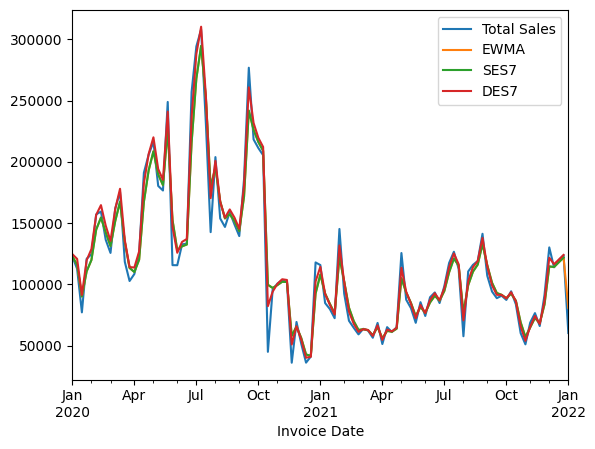

In [ ]:
encoded_df[['Total Sales','EWMA', 'SES7', 'DES7']].plot()


In [ ]:
len(encoded_df)

105

In [ ]:
train_data = encoded_df.iloc[:90]
test_data = encoded_df.iloc[90:]

In [ ]:
test_predictions = fitted_model.forecast(6)

In [ ]:
test_predictions

2022-01-09    80743.608923
2022-01-16    80743.608923
2022-01-23    80743.608923
2022-01-30    80743.608923
2022-02-06    80743.608923
2022-02-13    80743.608923
Freq: W-SUN, dtype: float64

Triple Exponential Smoothing

In [ ]:
encoded_df['TES7'] = ExponentialSmoothing(encoded_df['Total Sales'], trend = 'add', seasonal_periods = 1).fit().fittedvalues.shift(-1)

<Axes: xlabel='Invoice Date'>

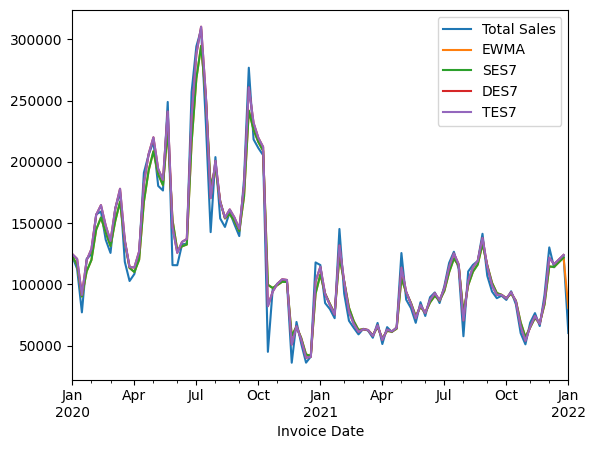

In [ ]:
encoded_df[['Total Sales','EWMA', 'SES7', 'DES7', 'TES7']].plot()

#Evaluation Metrics

Triple Exponential Smoothing

In [ ]:
fitted_model  =  ExponentialSmoothing(train_data['Total Sales'], trend = 'add', seasonal_periods = 1).fit()

In [ ]:
test_predictions = fitted_model.forecast(6)

In [ ]:
test_predictions

2021-09-26    91405.222894
2021-10-03    91865.772252
2021-10-10    92326.321610
2021-10-17    92786.870968
2021-10-24    93247.420326
2021-10-31    93707.969684
Freq: W-SUN, dtype: float64

In [ ]:
 train_data['Total Sales']


Invoice Date
2020-01-05    122685.500000
2020-01-12    112686.666667
2020-01-19     77069.333333
2020-01-26    120852.833333
2020-02-02    124492.777778
                  ...      
2021-08-22    119021.972222
2021-08-29    141264.833333
2021-09-05    106960.428571
2021-09-12     94067.272727
2021-09-19     88664.744186
Freq: W-SUN, Name: Total Sales, Length: 90, dtype: float64

In [ ]:
test_predictions

2021-09-26    91405.222894
2021-10-03    91865.772252
2021-10-10    92326.321610
2021-10-17    92786.870968
2021-10-24    93247.420326
2021-10-31    93707.969684
Freq: W-SUN, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
test_data['Total Sales'][:6]

Invoice Date
2021-09-26    90693.142857
2021-10-03    87228.272727
2021-10-10    94299.161290
2021-10-17    83611.414634
2021-10-24    60107.916667
2021-10-31    50948.600000
Freq: W-SUN, Name: Total Sales, dtype: float64

In [ ]:
mean_absolute_error(test_data['Total Sales'][:6],test_predictions)

15399.45815318155

In [ ]:
mean_squared_error(test_data['Total Sales'][:6],test_predictions)

506114158.95511746

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:6],test_predictions))


22496.981107586802

SES Evaluation

In [ ]:
encoded_df['SES7']['2021-09-26':'2022-01-02'].iloc[:15]

Invoice Date
2021-09-26     91414.877558
2021-10-03     88623.807671
2021-10-10     92407.376751
2021-10-17     86543.402006
2021-10-24     68919.745113
2021-10-31     56938.981704
2021-11-07     64763.716124
2021-11-14     72560.572041
2021-11-21     68123.124014
2021-11-28     83519.208005
2021-12-05    114589.618354
2021-12-12    114123.044502
2021-12-19    117990.132481
2021-12-26    121826.826769
2022-01-02              NaN
Freq: W-SUN, Name: SES7, dtype: float64

In [ ]:
test_data['Total Sales']

Invoice Date
2021-09-26     90693.142857
2021-10-03     87228.272727
2021-10-10     94299.161290
2021-10-17     83611.414634
2021-10-24     60107.916667
2021-10-31     50948.600000
2021-11-07     68676.083333
2021-11-14     76459.000000
2021-11-21     65904.400000
2021-11-28     91217.250000
2021-12-05    130124.823529
2021-12-12    113889.757576
2021-12-19    119923.676471
2021-12-26    123745.173913
2022-01-02     60202.000000
Freq: W-SUN, Name: Total Sales, dtype: float64

In [ ]:
mean_absolute_error(test_data['Total Sales'][:-1],encoded_df['SES7']['2021-09-26':'2021-12-26'])

4220.799722837752

In [ ]:
mean_squared_error(test_data['Total Sales'][:-1],encoded_df['SES7']['2021-09-26':'2021-12-26'])

33691387.59110095

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:-1],encoded_df['SES7']['2021-09-26':'2021-12-26']))

5804.428274266205

In [ ]:
encoded_df['Total Sales'].mean()

118063.5104528454

DES Evaluation


In [ ]:
mean_absolute_error(test_data['Total Sales'][:-1],encoded_df['DES7']['2021-09-26':'2021-12-26'])

2657.6010664259234

In [ ]:
mean_squared_error(test_data['Total Sales'][:-1],encoded_df['DES7']['2021-09-26':'2021-12-26'])

12022804.462843614

In [ ]:
np.sqrt(mean_squared_error(test_data['Total Sales'][:-1],encoded_df['DES7']['2021-09-26':'2021-12-26']))

3467.391593524391

In [ ]:
encoded_df['Total Sales'].mean()

118063.5104528454

#Check for Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(encoded_df['Total Sales'][:80])

Augmented Dickey-Fuller Test: 
ADF test statistic      -3.248282
p-value                  0.017355
# lags used              0.000000
# observations          79.000000
critical value (1%)     -3.515977
critical value (5%)     -2.898886
critical value (10%)    -2.586694
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


#AR,ARIMA

AR(1)

In [ ]:
len(encoded_df)

105

In [ ]:
auto_arima(encoded_df['Total Sales'] , seasonal = False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  105
Model:               SARIMAX(4, 1, 2)   Log Likelihood               -1235.913
Date:                Mon, 07 Aug 2023   AIC                           2485.826
Time:                        06:58:46   BIC                           2504.336
Sample:                    01-05-2020   HQIC                          2493.325
                         - 01-02-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2029      0.186     -1.091      0.275      -0.567       0.161
ar.L2          0.2487      0.192      1.293      0.196      -0.128       0.626
ar.L3          0.0176      0.146      0.121      0.904      -0.268       0.303
ar.L4         -0.2661      0.104     -2.558      0.011      -0.470      -0.062
ma.L1          0.0416      0.161      0.258      0.796      -0.274       0.357
ma.L2         -0.5938      0.153     -3.889      0.000      -0.893      -0.295
sigma2      1.309e+09   1.61e-10   8.13e+18      0.000    1.31e+09    1.31e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                13.76
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.81e+34. Standard errors may be unstable.
"""

In [ ]:
train_data = encoded_df.iloc[:90]
test_data = encoded_df.iloc[90:]

In [ ]:
test_data


,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,...,Sales Method_Online,Sales Method_Outlet,2-week-SMA,3-week-SMA,6-week-SMA,12-week-SMA,EWMA,SES7,DES7,TES7
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2021-09-26,1.164575e+06,45.428571,267.904762,90693.142857,35093.714286,0.442857,0.000000,0.095238,0.285714,0.238095,...,0.476190,0.380952,89678.943522,91141.719923,106778.732316,106762.737734,91414.877558,91414.877558,91296.830858,91296.830858
2021-10-03,1.176668e+06,37.545455,300.909091,87228.272727,36041.727273,0.473636,0.181818,0.000000,0.545455,0.000000,...,0.454545,0.454545,88960.707792,88862.053257,101479.782400,104245.489628,88623.807671,88623.807671,88495.178126,88495.178126
2021-10-10,1.185539e+06,43.032258,275.419355,94299.161290,35210.258065,0.428065,0.193548,0.322581,0.193548,0.129032,...,0.516129,0.258065,90763.717009,90740.192292,93652.170393,101554.750464,92407.376751,92407.376751,93515.921704,93515.921704
2021-10-17,1.175486e+06,40.804878,260.487805,83611.414634,30539.414634,0.418049,0.195122,0.243902,0.292683,0.146341,...,0.512195,0.292683,88955.287962,88379.616217,89760.668070,99143.637795,86543.402006,86543.402006,86079.421269,86079.421269
2021-10-24,1.173390e+06,39.611111,201.694444,60107.916667,21905.583333,0.415000,0.055556,0.250000,0.333333,0.138889,...,0.527778,0.361111,71859.665650,79339.497530,84100.775394,99355.589184,68919.745113,68919.745113,65645.887732,65645.887732
2021-10-31,1.168502e+06,42.000000,150.000000,50948.600000,19605.700000,0.425000,0.000000,0.700000,0.000000,0.000000,...,0.500000,0.500000,55528.258333,64889.310434,77814.751363,94395.251363,56938.981704,56938.981704,53801.417041,53801.417041
2021-11-07,1.187244e+06,41.166667,220.916667,68676.083333,25148.000000,0.422083,0.166667,0.541667,0.000000,0.166667,...,0.541667,0.250000,59812.341667,59910.866667,74145.241442,90461.986879,64763.716124,64763.716124,65347.460915,65347.460915
2021-11-14,1.178219e+06,41.971429,225.657143,76459.000000,25671.828571,0.400857,0.285714,0.428571,0.000000,0.085714,...,0.542857,0.228571,72567.541667,65361.227778,72350.362654,86915.072527,72560.572041,72560.572041,74126.721060,74126.721060
2021-11-21,1.177960e+06,38.942857,217.400000,65904.400000,23203.200000,0.410286,0.114286,0.400000,0.342857,0.085714,...,0.514286,0.342857,71181.700000,70346.494444,67617.902439,80635.036416,68123.124014,68123.124014,67637.720814,67637.720814


In [ ]:
model = AutoReg(train_data['Total Sales'], lags=1)
AR1fit = model.fit()

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1

predictions1 = AR1fit.predict(start, end, dynamic=False).rename('AR(1) Predictions')

In [ ]:
predictions1

2021-09-26     96888.277956
2021-10-03    103079.903934
2021-10-10    107741.675057
2021-10-17    111251.594758
2021-10-24    113894.267679
2021-10-31    115883.977062
2021-11-07    117382.060083
2021-11-14    118509.989998
2021-11-21    119359.225906
2021-11-28    119998.628777
2021-12-05    120480.045105
2021-12-12    120842.510917
2021-12-19    121115.417042
2021-12-26    121320.892292
2022-01-02    121475.597791
Freq: W-SUN, Name: AR(1) Predictions, dtype: float64

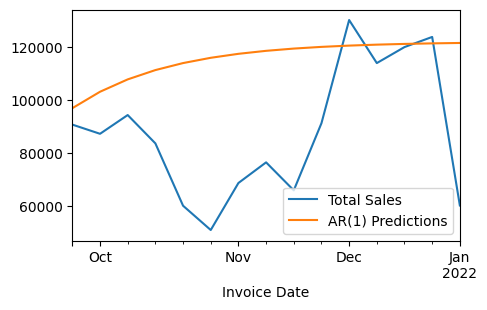

In [ ]:
test_data['Total Sales'].plot(legend=True)
predictions1.plot(legend=True,figsize=(5,3));

AR(2) Model

In [ ]:
model = AutoReg(train_data['Total Sales'], lags=2)
AR2fit = model.fit()

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions2 = AR2fit.predict(start,end, dynamic=False).rename('AR(2) Predictions')

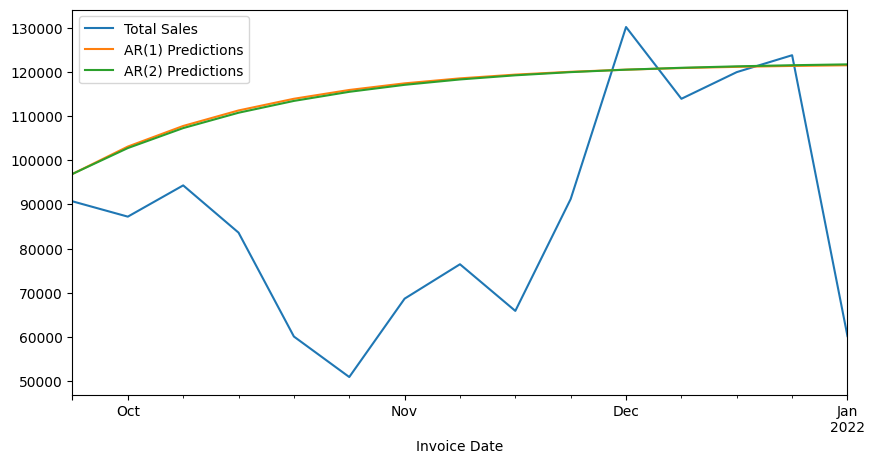

In [ ]:
test_data['Total Sales'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(10,5));

AR(p) model where statsmodels chooses p

In [ ]:
for i in range(1,10):
  model = AutoReg(train_data['Total Sales'], lags=i)
  ARfit = model.fit()
  predictions = ARfit.predict(start=start, end=end, dynamic=False)
  error = np.sqrt(mean_squared_error(test_data['Total Sales'], predictions))
  print(f'Lag {i} Error : {error}')
  min_error = float('inf')
  min_error = min(min_error, error)

print(min_error)



Lag 1 Error : 36581.75064580891
Lag 2 Error : 36393.1760919799
Lag 3 Error : 36816.423920757574
Lag 4 Error : 36161.137546515376
Lag 5 Error : 33560.158115274506
Lag 6 Error : 32773.06031767063
Lag 7 Error : 32320.84040067723
Lag 8 Error : 33028.62958683986
Lag 9 Error : 32426.018244529852
32426.018244529852


In [ ]:
model = AutoReg(train_data['Total Sales'], lags=9)
AR9fit = model.fit()

In [ ]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
predictions9 = AR9fit.predict(start=start, end=end, dynamic=False).rename('AR(9)')

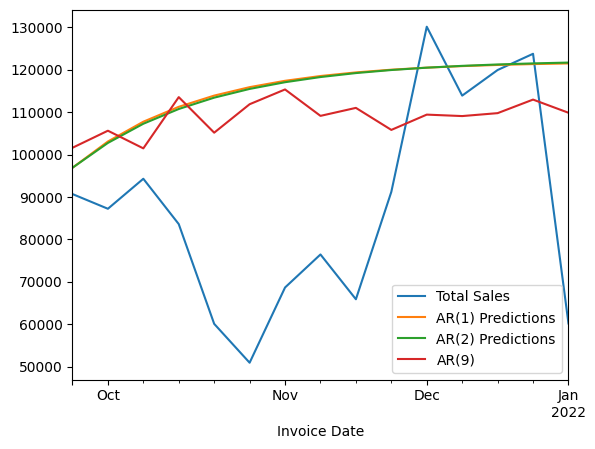

In [ ]:
test_data['Total Sales'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True);
predictions9.plot(legend=True);

Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(9)']
preds = [predictions1, predictions2, predictions9]

for i in range(3):
    error = np.sqrt(mean_squared_error(test_data['Total Sales'], preds[i]))
    print(f'{labels[i]} Error: {error}')

AR(1) Error: 36581.75064580891
AR(2) Error: 36393.1760919799
AR(9) Error: 32426.018244529852


Forecast

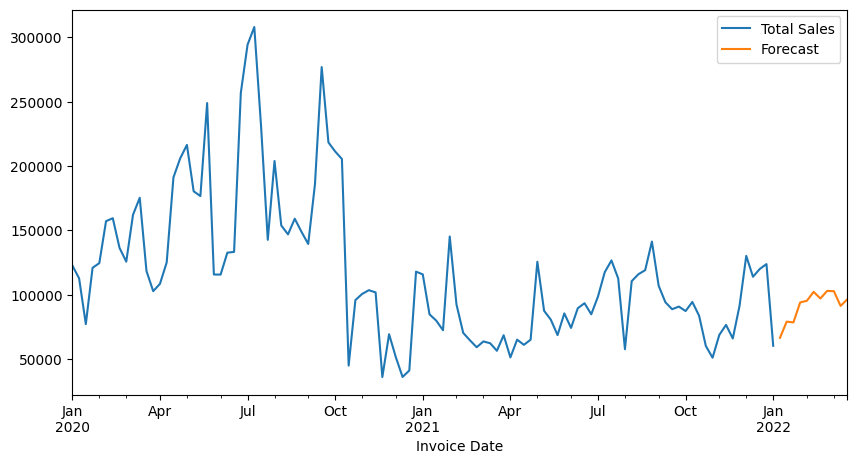

In [ ]:
model = AutoReg(encoded_df['Total Sales'], lags = 9)
ARfit = model.fit()
fcast = ARfit.predict(start=len(encoded_df), end=len(encoded_df)+ 10, dynamic=False).rename('Forecast')
encoded_df['Total Sales'].plot(legend=True)
fcast.plot(legend=True,figsize=(10,5));

In [ ]:
fcast

2022-01-09     66381.334546
2022-01-16     79005.854151
2022-01-23     78402.604854
2022-01-30     93921.047601
2022-02-06     95240.264762
2022-02-13    102166.089757
2022-02-20     96986.289116
2022-02-27    102864.964036
2022-03-06    102697.707746
2022-03-13     91232.020221
2022-03-20     96386.808145
Freq: W-SUN, Name: Forecast, dtype: float64

ARIMA

In [ ]:
auto_arima(encoded_df['Total Sales'],seasonal = False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  105
Model:               SARIMAX(4, 1, 2)   Log Likelihood               -1235.913
Date:                Mon, 07 Aug 2023   AIC                           2485.826
Time:                        06:59:12   BIC                           2504.336
Sample:                    01-05-2020   HQIC                          2493.325
                         - 01-02-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2029      0.186     -1.091      0.275      -0.567       0.161
ar.L2          0.2487      0.192      1.293      0.196      -0.128       0.626
ar.L3          0.0176      0.146      0.121      0.904      -0.268       0.303
ar.L4         -0.2661      0.104     -2.558      0.011      -0.470      -0.062
ma.L1          0.0416      0.161      0.258      0.796      -0.274       0.357
ma.L2         -0.5938      0.153     -3.889      0.000      -0.893      -0.295
sigma2      1.309e+09   1.61e-10   8.13e+18      0.000    1.31e+09    1.31e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                13.76
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.81e+34. Standard errors may be unstable.
"""

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model2 = ARIMA(encoded_df['Total Sales'], order = (4,1,2))

In [ ]:
results = model2.fit()

In [ ]:
len(encoded_df)

105

In [ ]:
train_data = encoded_df[:90]
test_data = encoded_df[90:]

In [ ]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [ ]:
predictions = results.predict(start,end).rename('ARIMA Model')

<Axes: xlabel='Invoice Date'>

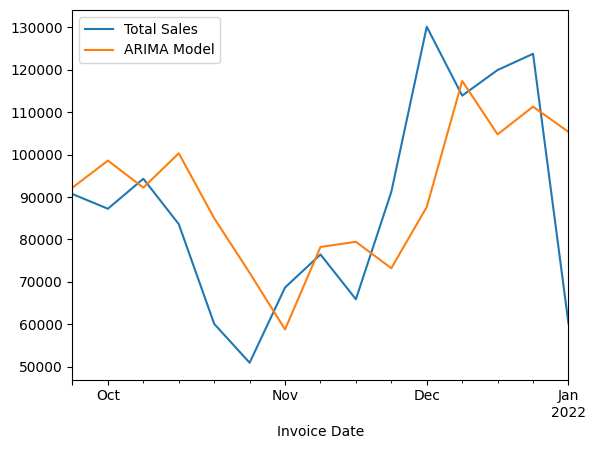

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test_data['Total Sales'],predictions)
error

20539.96736790859

In [ ]:
test_data['Total Sales'].mean()

87802.04486651237

In [ ]:
fcast = results.predict(len(encoded_df),len(encoded_df)+10).rename(' ARIMA Forecast')

In [ ]:
predictions

Invoice Date
2021-09-26     92213.092784
2021-10-03     98575.076861
2021-10-10     92203.033744
2021-10-17    100301.675044
2021-10-24     84999.224173
2021-10-31     72141.571351
2021-11-07     58791.478906
2021-11-14     78227.955654
2021-11-21     79439.856479
2021-11-28     73219.387742
2021-12-05     87661.428676
2021-12-12    117346.928577
2021-12-19    104755.579051
2021-12-26    111293.123068
2022-01-02    105339.932971
Freq: W-SUN, Name: ARIMA Model, dtype: float64

<Axes: xlabel='Invoice Date'>

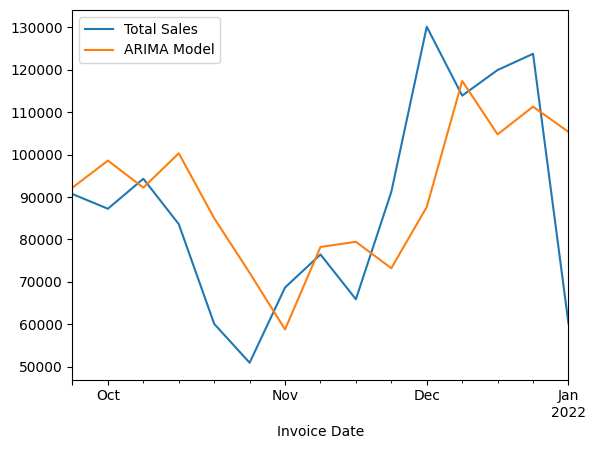

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)

#ARIMAX

In [ ]:
train_data = encoded_df[:90]
test_data = encoded_df[90:]

In [ ]:
model2 = ARIMA(endog = train_data['Total Sales'],exog = train_data.iloc[:, 7:57],  order = (4,1,2))

In [ ]:
results = model2.fit()

In [ ]:
len(encoded_df)

105

In [ ]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [ ]:
predictions = results.predict(start, end, exog = test_data.iloc[:, 7:57]).rename('ARIMAX Predictions')

In [ ]:
test_data['Total Sales']

Invoice Date
2021-09-26     90693.142857
2021-10-03     87228.272727
2021-10-10     94299.161290
2021-10-17     83611.414634
2021-10-24     60107.916667
2021-10-31     50948.600000
2021-11-07     68676.083333
2021-11-14     76459.000000
2021-11-21     65904.400000
2021-11-28     91217.250000
2021-12-05    130124.823529
2021-12-12    113889.757576
2021-12-19    119923.676471
2021-12-26    123745.173913
2022-01-02     60202.000000
Freq: W-SUN, Name: Total Sales, dtype: float64

<Axes: xlabel='Invoice Date'>

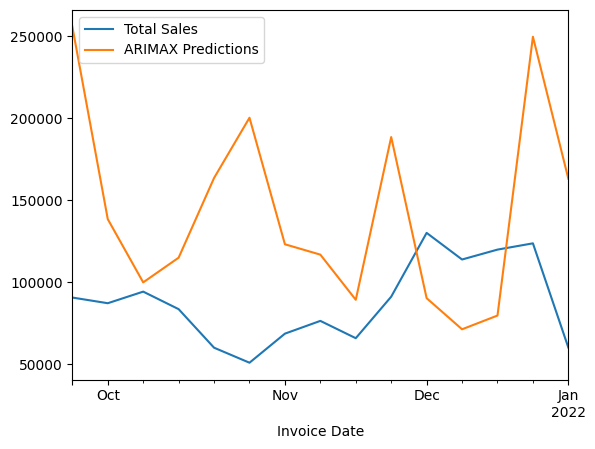

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test_data['Total Sales'],predictions)
error

85658.89238580612

In [ ]:
test_data['Total Sales'].mean()

87802.04486651237

#SARIMA

In [ ]:
result = seasonal_decompose(encoded_df['Total Sales'], model = 'add', period = 1)

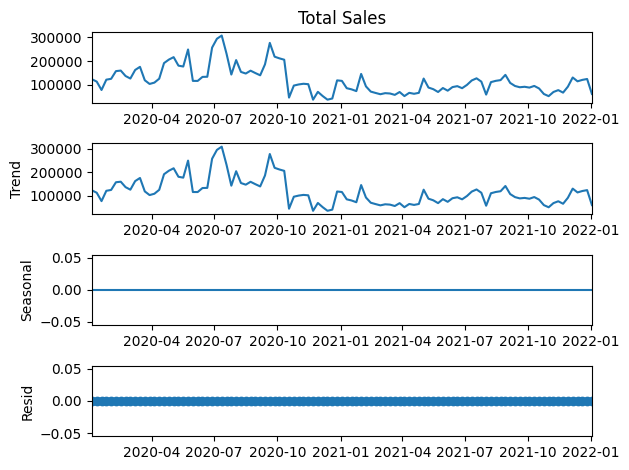

In [ ]:
result.plot();

In [ ]:
model = SARIMAX(train_data['Total Sales'], order = (4, 1, 2))


In [ ]:
results = model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Total Sales   No. Observations:                   90
Model:               SARIMAX(4, 1, 2)   Log Likelihood               -1062.357
Date:                Mon, 07 Aug 2023   AIC                           2138.715
Time:                        08:01:39   BIC                           2156.135
Sample:                    01-05-2020   HQIC                          2145.736
                         - 09-19-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2227      0.206     -1.081      0.280      -0.626       0.181
ar.L2          0.2303      0.218      1.056      0.291      -0.197       0.658
ar.L3          0.0035      0.163      0.022      0.983      -0.316       0.323
ar.L4         -0.2717      0.117     -2.327      0.020      -0.501      -0.043
ma.L1          0.0542      0.183      0.297      0.767      -0.304       0.412
ma.L2         -0.5725      0.178     -3.225      0.001      -0.920      -0.225
sigma2      1.461e+09   1.79e-10   8.15e+18      0.000    1.46e+09    1.46e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 9.69
Prob(Q):                              0.85   Prob(JB):                         0.01
Heteroskedasticity (H):               0.30   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.29e+34. Standard errors may be unstable.
"""

In [ ]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1

In [ ]:
predictions = results.predict(start, end).rename('SARIMA Predictions')

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test_data['Total Sales'],predictions)

In [ ]:
error

28530.29827206264

In [ ]:
test_data['Total Sales'].mean()

87802.04486651237

In [ ]:
test_data.shape

(15, 125)

In [ ]:
test_data.iloc[:, 6:60]

,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,Region_West,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,...,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2021-09-26,0.000000,0.095238,0.285714,0.238095,0.380952,0.142857,0.095238,0.142857,0.000000,0.0,...,0.000000,0.000000,0.0,0.142857,0.000000,0.000000,0.142857,0.0,0.000000,0.000000
2021-10-03,0.181818,0.000000,0.545455,0.000000,0.272727,0.272727,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.272727,0.000000,0.000000,0.000000,0.0,0.000000,0.181818
2021-10-10,0.193548,0.322581,0.193548,0.129032,0.161290,0.096774,0.000000,0.000000,0.000000,0.0,...,0.064516,0.000000,0.0,0.096774,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2021-10-17,0.195122,0.243902,0.292683,0.146341,0.121951,0.073171,0.000000,0.000000,0.000000,0.0,...,0.000000,0.048780,0.0,0.146341,0.073171,0.073171,0.000000,0.0,0.048780,0.000000
2021-10-24,0.055556,0.250000,0.333333,0.138889,0.222222,0.000000,0.055556,0.083333,0.083333,0.0,...,0.000000,0.000000,0.0,0.083333,0.000000,0.000000,0.083333,0.0,0.000000,0.000000
2021-10-31,0.000000,0.700000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2021-11-07,0.166667,0.541667,0.000000,0.166667,0.125000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.083333,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.083333
2021-11-14,0.285714,0.428571,0.000000,0.085714,0.200000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.057143,0.0,0.000000,0.085714,0.085714,0.000000,0.0,0.000000,0.000000
2021-11-21,0.114286,0.400000,0.342857,0.085714,0.057143,0.000000,0.057143,0.000000,0.085714,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.057143,0.000000


In [ ]:
fcast = results.predict(len(encoded_df),len(encoded_df)+10, exog = test_data.iloc[:, 6:60]).rename('Forecast')

<Axes: xlabel='Invoice Date'>

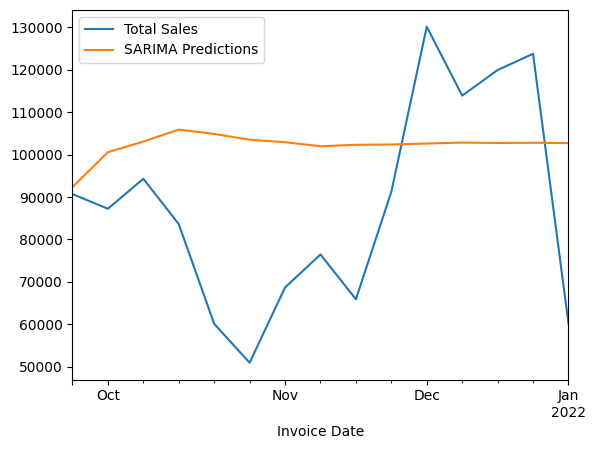

In [ ]:
test_data['Total Sales'].plot(legend = True)
predictions.plot(legend = True)

#SARIMAX

In [ ]:
encoded_df.shape

(105, 125)

In [ ]:
encoded_df.columns

Index(['Retailer ID', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South', 'Region_Southeast',
       ...
       'Sales Method_Online', 'Sales Method_Outlet', '2-week-SMA',
       '3-week-SMA', '6-week-SMA', '12-week-SMA', 'EWMA', 'SES7', 'DES7',
       'TES7'],
      dtype='object', length=125)

In [ ]:
train = encoded_df[:90]
test = encoded_df[90:]

In [ ]:
encoded_df.columns

Index(['Retailer ID', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South', 'Region_Southeast',
       ...
       'Sales Method_Online', 'Sales Method_Outlet', '2-week-SMA',
       '3-week-SMA', '6-week-SMA', '12-week-SMA', 'EWMA', 'SES7', 'DES7',
       'TES7'],
      dtype='object', length=125)

In [ ]:
selected_cols = ['3-week-SMA'	,'6-week-SMA',	'12-week-SMA',	'EWMA',	'SES7'	,'DES7',	'TES7', '2-week-SMA']

In [ ]:
train.drop(selected_cols, axis = 1, inplace = True)

In [ ]:
len(train.columns)

117

In [ ]:
train.columns

Index(['Retailer ID', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South', 'Region_Southeast',
       ...
       'City_San Francisco', 'City_Seattle', 'City_Sioux Falls',
       'City_St. Louis', 'City_Wichita', 'City_Wilmington',
       'Product_Men's Athletic Footwear', 'Sales Method_In-store',
       'Sales Method_Online', 'Sales Method_Outlet'],
      dtype='object', length=117)

In [ ]:
model = SARIMAX(train['Total Sales'],exog=train.iloc[: ,7:57],order=(4,1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Total Sales   No. Observations:                   90
Model:               SARIMAX(4, 1, 2)   Log Likelihood               -1053.568
Date:                Mon, 07 Aug 2023   AIC                           2221.137
Time:                        08:01:43   BIC                           2362.989
Sample:                    01-05-2020   HQIC                          2278.314
                         - 09-19-2021                                         
Covariance Type:                  opg                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Region_Northeast      5.774e+04   1.29e+05      0.448      0.654   -1.95e+05     3.1e+05
Region_South         -1.623e+05   1.92e+05     -0.846      0.398   -5.38e+05    2.14e+05
Region_Southeast      1.542e+05   3.01e+05      0.512      0.609   -4.36e+05    7.45e+05
Region_West          -5.449e+04   2.22e+05     -0.245      0.806    -4.9e+05    3.81e+05
State_Alabama         2.272e+05   8.45e+04      2.689      0.007    6.16e+04    3.93e+05
State_Alaska         -2.645e+05   1.43e+05     -1.844      0.065   -5.46e+05    1.66e+04
State_Arizona         4.136e+04    3.2e+05      0.129      0.897   -5.86e+05    6.69e+05
State_Arkansas       -9.778e+05   2.15e+05     -4.538      0.000    -1.4e+06   -5.55e+05
State_California      1.354e+05   5.97e+04      2.266      0.023    1.83e+04    2.52e+05
State_Colorado       -5.108e+04   2.08e+04     -2.454      0.014   -9.19e+04   -1.03e+04
State_Connecticut    -1.452e+05   2.75e+05     -0.528      0.597   -6.84e+05    3.93e+05
State_Delaware        1.658e+05   1.72e+05      0.961      0.336   -1.72e+05    5.04e+05
State_Florida        -1.778e+05   2.63e+05     -0.675      0.500   -6.94e+05    3.39e+05
State_Georgia        -1.174e+05      6e+05     -0.196      0.845   -1.29e+06    1.06e+06
State_Hawaii         -1.694e+05   1.83e+05     -0.927      0.354   -5.28e+05    1.89e+05
State_Idaho          -1.107e+04   3.38e+05     -0.033      0.974   -6.74e+05    6.52e+05
State_Illinois        6.577e+04   4.23e+05      0.155      0.877   -7.64e+05    8.96e+05
State_Indiana        -1.694e+05   1.83e+05     -0.927      0.354   -5.28e+05    1.89e+05
State_Iowa            4.121e+04   5.89e+05      0.070      0.944   -1.11e+06     1.2e+06
State_Kansas         -7.176e+05   2.03e+05     -3.537      0.000   -1.12e+06    -3.2e+05
State_Kentucky        7.195e+05   1.44e+05      4.994      0.000    4.37e+05       1e+06
State_Louisiana      -1.566e+05   2.62e+05     -0.598      0.550    -6.7e+05    3.57e+05
State_Maine           1.974e+05   3.15e+04      6.262      0.000    1.36e+05    2.59e+05
State_Maryland        5.982e+05   2.14e+05      2.802      0.005     1.8e+05    1.02e+06
State_Massachusetts   9.496e+04   3.05e+05      0.311      0.756   -5.03e+05    6.93e+05
State_Michigan        1.456e+05   1.36e+05      1.067      0.286   -1.22e+05    4.13e+05
State_Minnesota      -3052.2887   2.16e+05     -0.014      0.989   -4.26e+05     4.2e+05
State_Mississippi     2.184e+05   2.05e+05      1.067      0.286   -1.83e+05    6.19e+05
State_Missouri         5.35e+05    1.4e+05      3.820      0.000    2.61e+05    8.09e+05
State_Montana         1.986e+05   4.79e+04      4.146      0.000    1.05e+05    2.93e+05
State_Nebraska       -2.224e+05   5.74e+05     -0.387      0.698   -1.35e+06    9.03e+05
State_Nevada         -9.163e+04   5.29e+04     -1.731      0.084   -1.95e+05    1.21e+04
State_New Hampshire  -2.263e+05   2.17e+05     -1.044      0.297   -6.51e+05    1.99e+05
State_New Jersey      1.669e+05   2.7

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

In [ ]:
predictions = results.predict(start = start, end = end, exog = test.iloc[:, 7:57]).rename('SARIMAX Predictions')

In [ ]:
test_data.columns

Index(['Retailer ID', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South', 'Region_Southeast',
       ...
       'Sales Method_Online', 'Sales Method_Outlet', '2-week-SMA',
       '3-week-SMA', '6-week-SMA', '12-week-SMA', 'EWMA', 'SES7', 'DES7',
       'TES7'],
      dtype='object', length=125)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test_data['Total Sales'],predictions)

In [ ]:

test_data['Total Sales']


Invoice Date
2021-09-26     90693.142857
2021-10-03     87228.272727
2021-10-10     94299.161290
2021-10-17     83611.414634
2021-10-24     60107.916667
2021-10-31     50948.600000
2021-11-07     68676.083333
2021-11-14     76459.000000
2021-11-21     65904.400000
2021-11-28     91217.250000
2021-12-05    130124.823529
2021-12-12    113889.757576
2021-12-19    119923.676471
2021-12-26    123745.173913
2022-01-02     60202.000000
Freq: W-SUN, Name: Total Sales, dtype: float64

In [ ]:
predictions

2021-09-26    255835.360196
2021-10-03    138494.701559
2021-10-10     99942.504314
2021-10-17    115003.993774
2021-10-24    163596.371515
2021-10-31    200344.027216
2021-11-07    123179.278255
2021-11-14    116852.848463
2021-11-21     89322.877670
2021-11-28    188554.838549
2021-12-05     90310.445663
2021-12-12     71331.859349
2021-12-19     79716.581101
2021-12-26    249733.811885
2022-01-02    163177.212549
Freq: W-SUN, Name: SARIMAX Predictions, dtype: float64

In [ ]:
error

85658.89238580612

In [ ]:
test_data['Total Sales'].mean()

87802.04486651237

<Axes: xlabel='Invoice Date'>

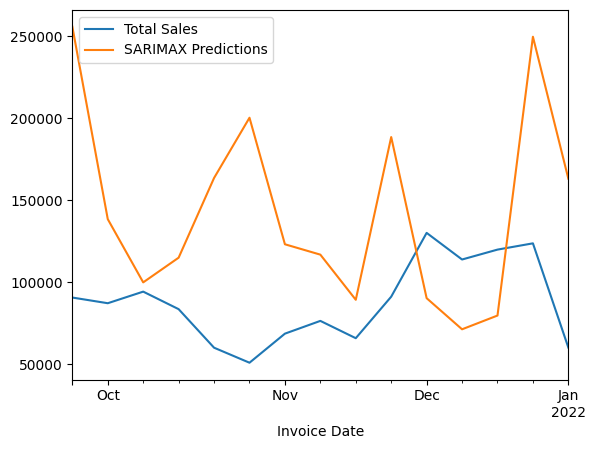

In [ ]:
test_data['Total Sales'].plot(legend=True)
predictions.plot(legend=True)


# VAR, VARIMA



VAR

In [ ]:
transformed_df = encoded_df[['Price per Unit', 'Total Sales']]

In [ ]:
train_data = transformed_df.iloc[:90]
test_data = transformed_df.iloc[90:]

In [ ]:
test_data.iloc[0]

Price per Unit       45.428571
Total Sales       90693.142857
Name: 2021-09-26 00:00:00, dtype: float64

In [ ]:
for i in [1,2,3,4,5,6,7]:
    model = VAR(transformed_df)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  24.268500165447637
BIC:  24.421061178859638

Order = 2
AIC:  24.320918099600092
BIC:  24.576717030496173

Order = 3
AIC:  24.33969274814965
BIC:  24.699983134286708

Order = 4
AIC:  24.260718880730867
BIC:  24.7267799629402

Order = 5
AIC:  24.228966771898214
BIC:  24.802104212815593

Order = 6
AIC:  24.229948452710936
BIC:  24.91149508001901

Order = 7
AIC:  24.207632676736264
BIC:  24.998949251839502




## Fit the VAR(1) Model

In [ ]:
results = model.fit(1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Aug, 2023
Time:                     08:01:45
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    24.4211
Nobs:                     104.000    HQIC:                   24.3303
Log likelihood:          -1551.10    FPE:                3.46489e+10
AIC:                      24.2685    Det(Omega_mle):     3.27332e+10
--------------------------------------------------------------------
Results for equation Price per Unit
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    10.946104         3.602699            3.038           0.002
L1.Price per Unit         0.811222         0.104184            7.786           0.000
L1.Total Sales           -0.000016 

In [ ]:
lag_order = results.k_ar
lag_order

1

In [ ]:
z = results.forecast(y=train_data.values[-lag_order:], steps=10)
z

array([[4.44364848e+01, 9.50667813e+04],
       [4.54405888e+01, 1.00428265e+05],
       [4.61675352e+01, 1.04781704e+05],
       [4.66861163e+01, 1.08230685e+05],
       [4.70504456e+01, 1.10907351e+05],
       [4.73022617e+01, 1.12947563e+05],
       [4.74732042e+01, 1.14477483e+05],
       [4.75868781e+01, 1.15607346e+05],
       [4.76606313e+01, 1.16429537e+05],
       [4.77070272e+01, 1.17019119e+05]])

In [ ]:
test_data

,Price per Unit,Total Sales
Invoice Date,,
2021-09-26,45.428571,90693.142857
2021-10-03,37.545455,87228.272727
2021-10-10,43.032258,94299.161290
2021-10-17,40.804878,83611.414634
2021-10-24,39.611111,60107.916667
2021-10-31,42.000000,50948.600000
2021-11-07,41.166667,68676.083333
2021-11-14,41.971429,76459.000000
2021-11-21,38.942857,65904.400000


In [ ]:
idx = pd.date_range('2021-09-26', periods=10, freq='W')
df_forecast = pd.DataFrame(z, index=idx, columns=['Price Per Unit','Total Sales'])
df_forecast

,Price Per Unit,Total Sales
2021-09-26,44.436485,95066.781325
2021-10-03,45.440589,100428.265053
2021-10-10,46.167535,104781.704479
2021-10-17,46.686116,108230.684525
2021-10-24,47.050446,110907.351092
2021-10-31,47.302262,112947.563128
2021-11-07,47.473204,114477.483393
2021-11-14,47.586878,115607.345619
2021-11-21,47.660631,116429.537032
2021-11-28,47.707027,117019.118818


## Plot the results
The VARResults object offers a couple of quick plotting tools:

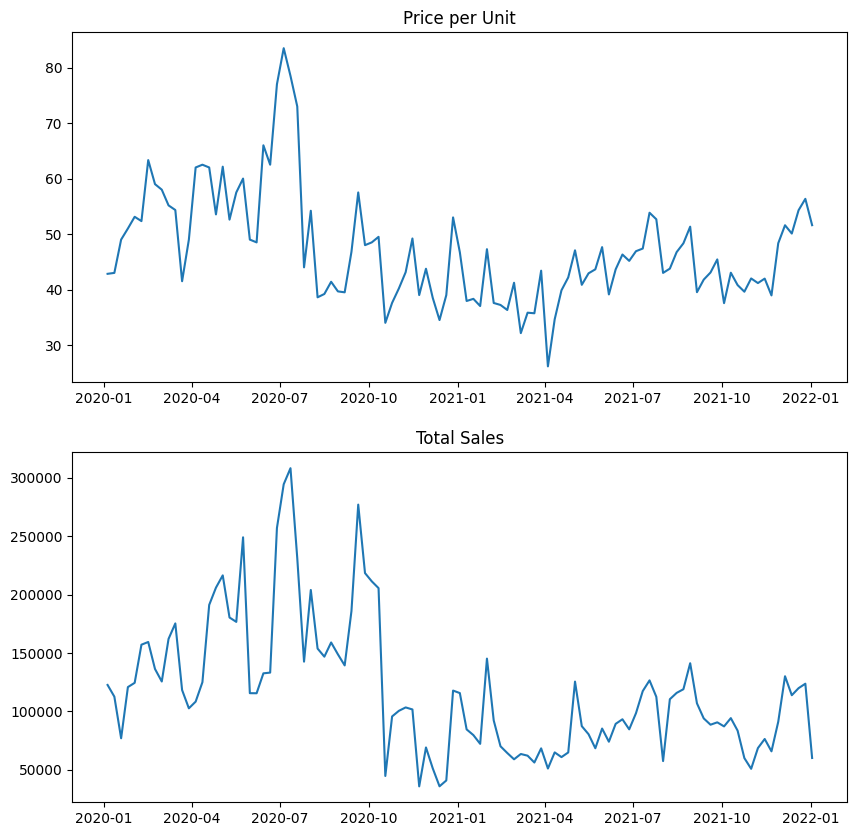

In [ ]:
results.plot();

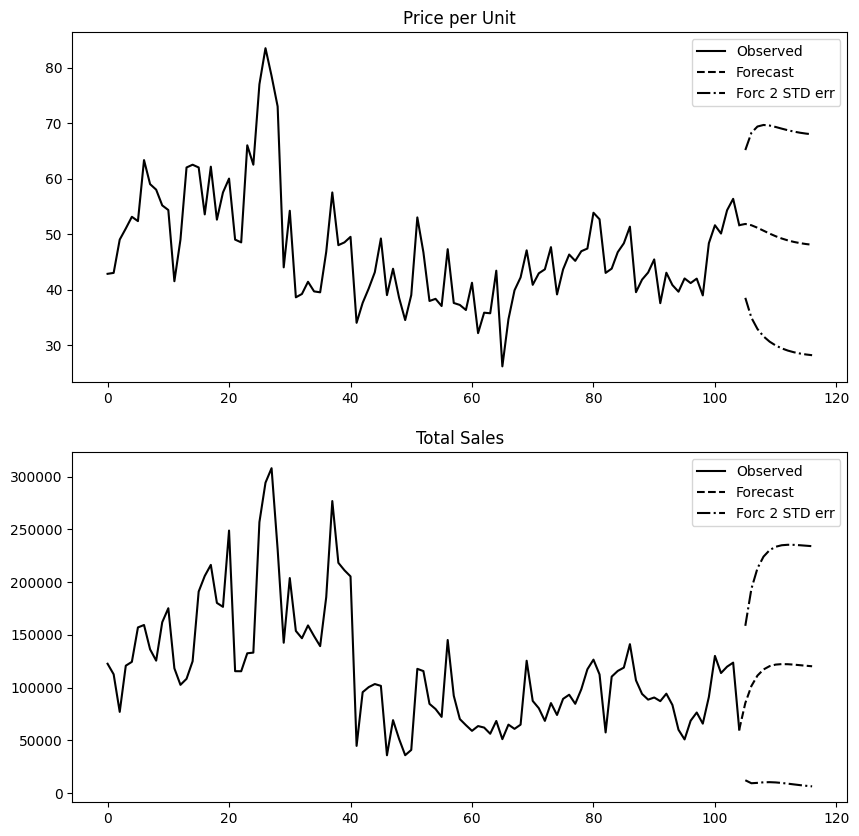

In [ ]:
results.plot_forecast(12);

But for our investigation we want to plot predicted values against our test set.

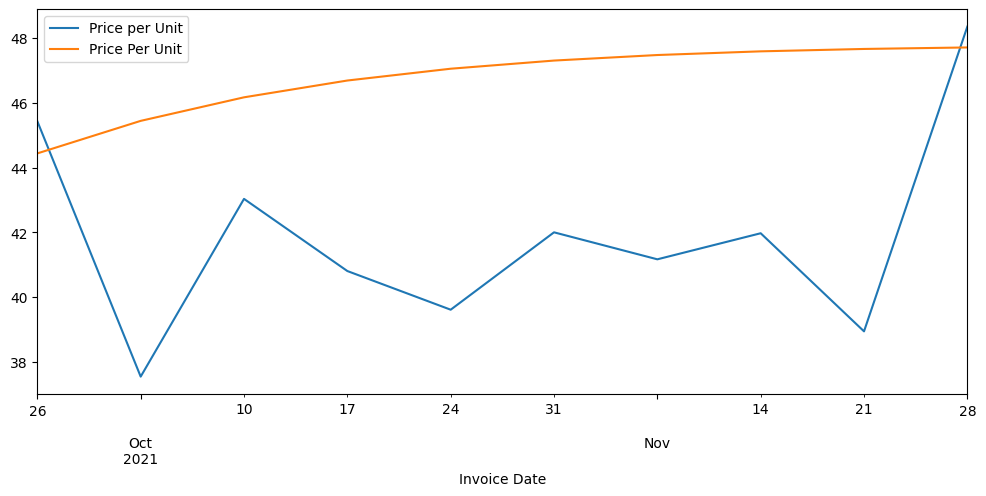

In [ ]:
transformed_df['Price per Unit']['2021-09-26':'2021-11-28'].plot(figsize=(12,5),legend=True)
df_forecast['Price Per Unit'].plot(legend=True);

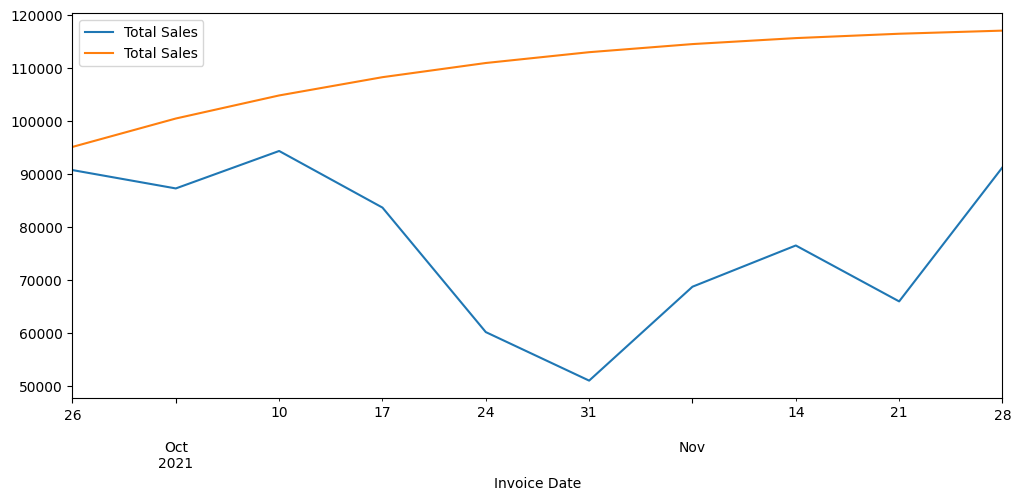

In [ ]:
 transformed_df['Total Sales']['2021-09-26':'2021-11-28'].plot(figsize=(12,5),legend=True)
df_forecast['Total Sales'].plot(legend=True);

### Evaluate the model

&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>
where $T$ is the last observation period and $l$ is the lag.

In [ ]:
transformed_df

,Price per Unit,Total Sales
Invoice Date,,
2020-01-05,42.833333,122685.500000
2020-01-12,43.000000,112686.666667
2020-01-19,49.000000,77069.333333
2020-01-26,51.000000,120852.833333
2020-02-02,53.111111,124492.777778
...,...,...
2021-12-05,51.588235,130124.823529
2021-12-12,50.090909,113889.757576
2021-12-19,54.294118,119923.676471


In [ ]:
df_forecast

,Price Per Unit,Total Sales
2021-09-26,44.436485,95066.781325
2021-10-03,45.440589,100428.265053
2021-10-10,46.167535,104781.704479
2021-10-17,46.686116,108230.684525
2021-10-24,47.050446,110907.351092
2021-10-31,47.302262,112947.563128
2021-11-07,47.473204,114477.483393
2021-11-14,47.586878,115607.345619
2021-11-21,47.660631,116429.537032
2021-11-28,47.707027,117019.118818


In [ ]:
RMSE1 = rmse(transformed_df['Price per Unit']['2021-09-26':'2021-11-28'], df_forecast['Price Per Unit'])
RMSE1

5.8216206731571365

In [ ]:
RMSE2 = rmse(transformed_df['Total Sales']['2021-09-26':'2021-11-28'], df_forecast['Price Per Unit'])
RMSE2

78154.05331975847

In [ ]:
transformed_df['Price per Unit'].mean()


47.311524601852994

In [ ]:
transformed_df['Total Sales'].mean()

118063.5104528454

#Facebook Prophet Forecasting

In [ ]:
original = pd.read_excel('/content/Men Athletic Wear.xlsx')

In [ ]:
original

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Sales Method,Units Sold,Total Sales,Operating Profit,Operating Margin
0,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,In-store,1000,500000,150000,0.30
1,Foot Locker,1185732,2020-01-08,Northeast,New York,New York,Men's Athletic Footwear,50,Outlet,900,450000,135000,0.30
2,Foot Locker,1185732,2020-01-26,Northeast,New York,New York,Men's Athletic Footwear,50,Outlet,925,462500,138750,0.30
3,Foot Locker,1185732,2020-02-01,Northeast,New York,New York,Men's Athletic Footwear,50,Outlet,900,450000,135000,0.30
4,Foot Locker,1185732,2020-02-07,Northeast,New York,New York,Men's Athletic Footwear,55,Outlet,925,508750,152625,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Foot Locker,1185732,2021-10-19,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,44,Outlet,99,4356,1917,0.44
1606,Foot Locker,1185732,2021-11-18,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,Outlet,114,4788,2059,0.43
1607,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,49,Outlet,128,6272,2634,0.42
1608,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,36,Outlet,93,3348,1339,0.40


In [ ]:
columns_to_encode = ['Region', 'State', 'City', 'Product', 'Sales Method']
original_df = pd.get_dummies(original, columns=columns_to_encode)
print(list(original_df))

['Retailer', 'Retailer ID', 'Invoice Date', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Region_Midwest', 'Region_Northeast', 'Region_South', 'Region_Southeast', 'Region_West', 'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina', 'State_North Dakota', 'State_Ohio', 'State_Oklahoma', 'State_Oregon', 'State_Pennsylvania', 'State_Rhode Island', 'State_South Carolina', 'State_South Dakota', 'State_Tennessee', '

In [ ]:
original_df.index = pd.to_datetime(original_df.index)
original_df.set_index('Invoice Date', inplace = True)

In [ ]:
original_df = original_df.resample(rule = 'W').mean()

In [ ]:
original_df

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,Region_Southeast,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
Invoice Date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,1.157016e+06,42.833333,380.333333,122685.500000,35526.500000,0.333333,0.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000
2020-01-12,1.157016e+06,43.000000,362.333333,112686.666667,32654.166667,0.338333,0.000000,0.500000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2020-01-19,1.128299e+06,49.000000,214.666667,77069.333333,19689.000000,0.323333,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2020-01-26,1.157016e+06,51.000000,344.500000,120852.833333,34815.000000,0.335000,0.000000,0.500000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2020-02-02,1.147443e+06,53.111111,330.000000,124492.777778,37824.666667,0.354444,0.000000,0.333333,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-05,1.187867e+06,51.588235,308.647059,130124.823529,47916.411765,0.425882,0.235294,0.352941,0.000000,0.235294,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.176471,0.588235,0.235294
2021-12-12,1.177763e+06,50.090909,272.515152,113889.757576,38099.939394,0.406061,0.303030,0.393939,0.000000,0.090909,...,0.0,0.0,0.060606,0.000000,0.060606,0.000000,1.0,0.242424,0.545455,0.212121
2021-12-19,1.177732e+06,54.294118,275.852941,119923.676471,42075.470588,0.401471,0.117647,0.441176,0.352941,0.088235,...,0.0,0.0,0.000000,0.058824,0.000000,0.058824,1.0,0.176471,0.500000,0.323529


In [ ]:
df = original_df['Total Sales'].copy()

In [ ]:
original_df.reset_index(drop=False, inplace=True)


In [ ]:
original_df

,Invoice Date,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
0,2020-01-05,1.157016e+06,42.833333,380.333333,122685.500000,35526.500000,0.333333,0.000000,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000
1,2020-01-12,1.157016e+06,43.000000,362.333333,112686.666667,32654.166667,0.338333,0.000000,0.500000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2,2020-01-19,1.128299e+06,49.000000,214.666667,77069.333333,19689.000000,0.323333,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
3,2020-01-26,1.157016e+06,51.000000,344.500000,120852.833333,34815.000000,0.335000,0.000000,0.500000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
4,2020-02-02,1.147443e+06,53.111111,330.000000,124492.777778,37824.666667,0.354444,0.000000,0.333333,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2021-12-05,1.187867e+06,51.588235,308.647059,130124.823529,47916.411765,0.425882,0.235294,0.352941,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.176471,0.588235,0.235294
101,2021-12-12,1.177763e+06,50.090909,272.515152,113889.757576,38099.939394,0.406061,0.303030,0.393939,0.000000,...,0.0,0.0,0.060606,0.000000,0.060606,0.000000,1.0,0.242424,0.545455,0.212121
102,2021-12-19,1.177732e+06,54.294118,275.852941,119923.676471,42075.470588,0.401471,0.117647,0.441176,0.352941,...,0.0,0.0,0.000000,0.058824,0.000000,0.058824,1.0,0.176471,0.500000,0.323529
103,2021-12-26,1.155767e+06,56.347826,281.782609,123745.173913,45556.260870,0.424348,0.000000,0.304348,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.130435,0.521739,0.347826


In [ ]:
selected_columns = ['Invoice Date', 'Total Sales']

In [ ]:
df = original_df[selected_columns].copy()

In [ ]:
df

,Invoice Date,Total Sales
0,2020-01-05,122685.500000
1,2020-01-12,112686.666667
2,2020-01-19,77069.333333
3,2020-01-26,120852.833333
4,2020-02-02,124492.777778
...,...,...
100,2021-12-05,130124.823529
101,2021-12-12,113889.757576
102,2021-12-19,119923.676471
103,2021-12-26,123745.173913


In [ ]:
df.columns = ['ds', 'y']

In [ ]:
train = df.iloc[:90]
test = df.iloc[90:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=10,freq='W')
forecast = m.predict(future)

2023-08-07 08:01:52,055 - INFO     - Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2023-08-07 08:01:52,058 - INFO     - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2023-08-07 08:01:52,061 - INFO     - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
08:01:52 - cmdstanpy - INFO - Chain [1] start processing
2023-08-07 08:01:52,096 - INFO     - Chain [1] start processing
08:01:52 - cmdstanpy - INFO - Chain [1] done processing
2023-08-07 08:01:52,505 - INFO     - Chain [1] done processing


In [ ]:
future

,ds
0,2020-01-05
1,2020-01-12
2,2020-01-19
3,2020-01-26
4,2020-02-02
...,...
95,2021-10-31
96,2021-11-07
97,2021-11-14
98,2021-11-21


In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-05,170142.714015,105114.576998,239025.448314,170142.714015,170142.714015,0.0,0.0,0.0,0.0,0.0,0.0,170142.714015
1,2020-01-12,169085.684765,104930.477712,236772.527539,169085.684765,169085.684765,0.0,0.0,0.0,0.0,0.0,0.0,169085.684765
2,2020-01-19,168028.655515,106063.585624,237560.588404,168028.655515,168028.655515,0.0,0.0,0.0,0.0,0.0,0.0,168028.655515
3,2020-01-26,166971.626265,98275.718156,238340.288625,166971.626265,166971.626265,0.0,0.0,0.0,0.0,0.0,0.0,166971.626265
4,2020-02-02,165914.597013,101263.881658,233558.561751,165914.597013,165914.597013,0.0,0.0,0.0,0.0,0.0,0.0,165914.597013


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
95,2021-10-31,69688.261806,2904.293515,140006.948191,69688.123829,69688.410182,0.0,0.0,0.0,0.0,0.0,0.0,69688.261806
96,2021-11-07,68630.682772,89.439810,131484.900929,68630.497541,68630.871014,0.0,0.0,0.0,0.0,0.0,0.0,68630.682772
97,2021-11-14,67573.103739,-1415.038402,133189.110911,67572.863302,67573.339117,0.0,0.0,0.0,0.0,0.0,0.0,67573.103739
98,2021-11-21,66515.524706,-1857.924778,133118.421512,66515.234086,66515.808594,0.0,0.0,0.0,0.0,0.0,0.0,66515.524706
99,2021-11-28,65457.945673,-513.028337,130173.813065,65457.598845,65458.278036,0.0,0.0,0.0,0.0,0.0,0.0,65457.945673


In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
88,2021-09-12,77091.315039,4340.225333,139978.488023
89,2021-09-19,76033.736005,8209.234938,149839.144245
90,2021-09-26,74976.156972,9109.722018,146705.342930
91,2021-10-03,73918.577939,8306.432004,143122.627391
92,2021-10-10,72860.998906,5790.844708,140057.546589
93,2021-10-17,71803.419872,5089.770727,132677.466461
94,2021-10-24,70745.840839,1874.298843,137137.668564
95,2021-10-31,69688.261806,2904.293515,140006.948191
96,2021-11-07,68630.682772,89.439810,131484.900929
97,2021-11-14,67573.103739,-1415.038402,133189.110911


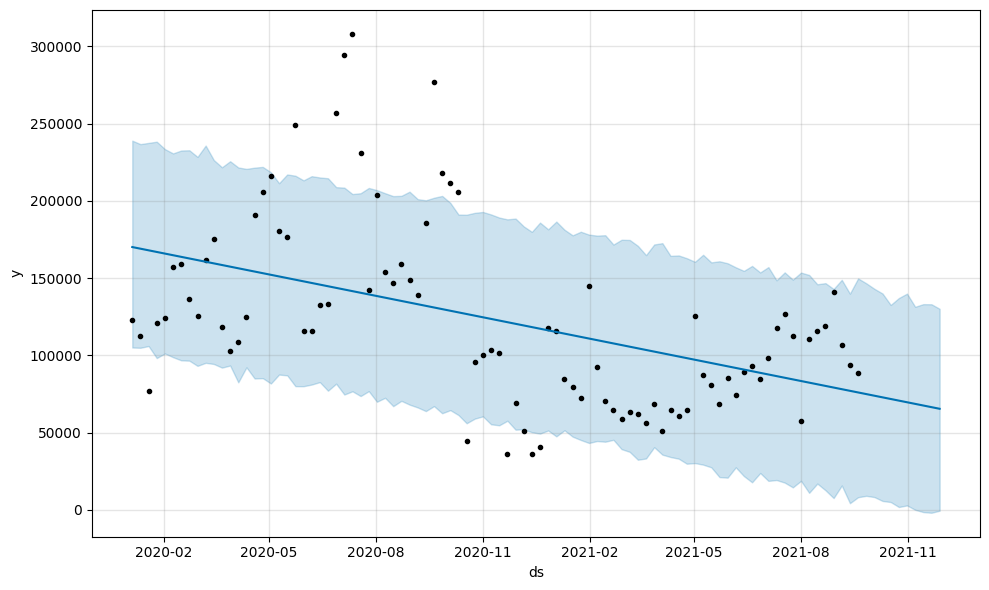

In [ ]:
import matplotlib.pyplot as plt
m.plot(forecast);

<Axes: xlabel='ds'>

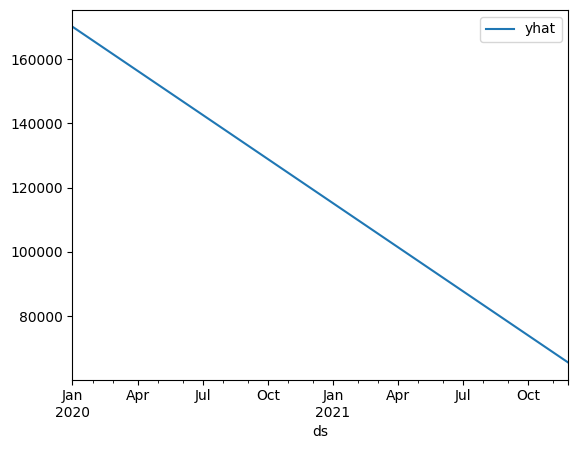

In [ ]:
forecast.plot(x='ds',y='yhat')

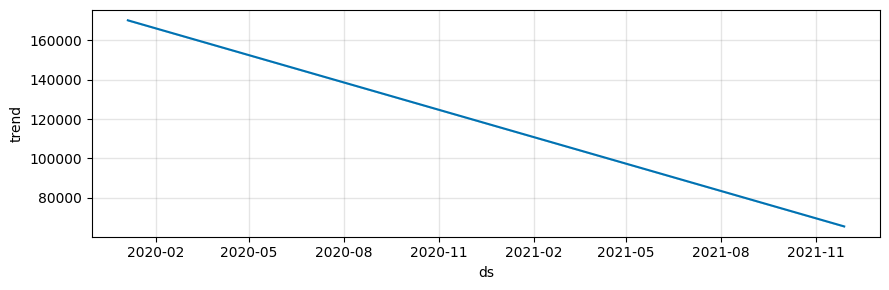

In [ ]:
m.plot_components(forecast);



<Axes: xlabel='ds'>

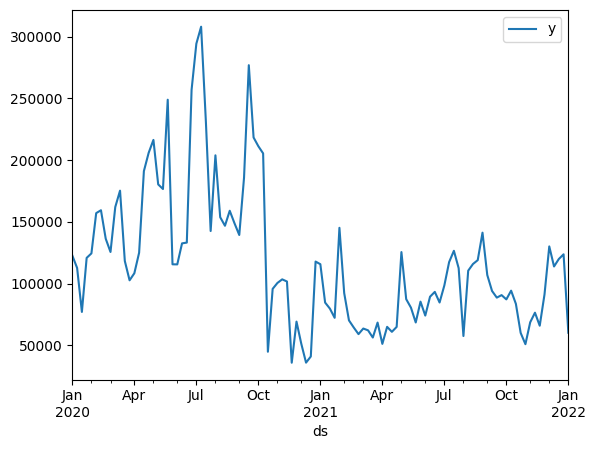

In [ ]:
df.plot(x= 'ds', y = 'y')

<Axes: xlabel='ds'>

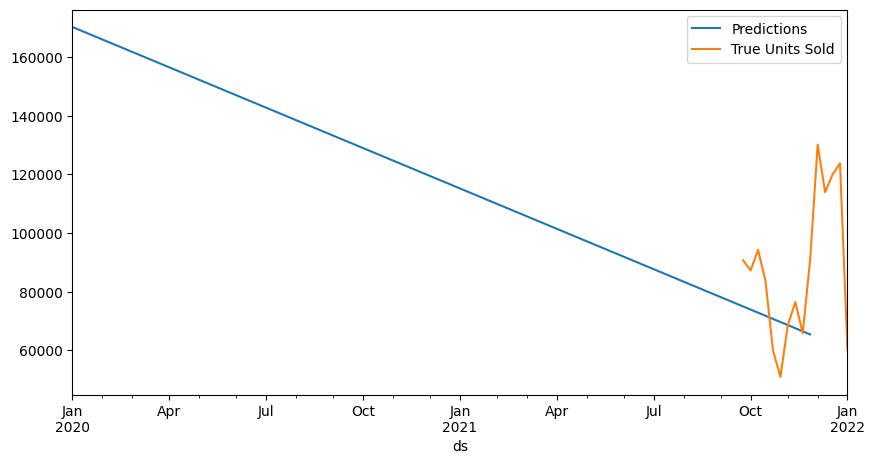

In [ ]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(10,5))
test.plot(x='ds',y='y',label='True Units Sold',legend=True,ax=ax)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[90:104]['yhat']

In [ ]:
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-05,170142.714015,105114.576998,239025.448314,170142.714015,170142.714015,0.0,0.0,0.0,0.0,0.0,0.0,170142.714015
1,2020-01-12,169085.684765,104930.477712,236772.527539,169085.684765,169085.684765,0.0,0.0,0.0,0.0,0.0,0.0,169085.684765
2,2020-01-19,168028.655515,106063.585624,237560.588404,168028.655515,168028.655515,0.0,0.0,0.0,0.0,0.0,0.0,168028.655515
3,2020-01-26,166971.626265,98275.718156,238340.288625,166971.626265,166971.626265,0.0,0.0,0.0,0.0,0.0,0.0,166971.626265
4,2020-02-02,165914.597013,101263.881658,233558.561751,165914.597013,165914.597013,0.0,0.0,0.0,0.0,0.0,0.0,165914.597013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-10-31,69688.261806,2904.293515,140006.948191,69688.123829,69688.410182,0.0,0.0,0.0,0.0,0.0,0.0,69688.261806
96,2021-11-07,68630.682772,89.439810,131484.900929,68630.497541,68630.871014,0.0,0.0,0.0,0.0,0.0,0.0,68630.682772
97,2021-11-14,67573.103739,-1415.038402,133189.110911,67572.863302,67573.339117,0.0,0.0,0.0,0.0,0.0,0.0,67573.103739
98,2021-11-21,66515.524706,-1857.924778,133118.421512,66515.234086,66515.808594,0.0,0.0,0.0,0.0,0.0,0.0,66515.524706


In [ ]:
predictions

90    74976.156972
91    73918.577939
92    72860.998906
93    71803.419872
94    70745.840839
95    69688.261806
96    68630.682772
97    67573.103739
98    66515.524706
99    65457.945673
Name: yhat, dtype: float64

In [ ]:
test['y']

90      90693.142857
91      87228.272727
92      94299.161290
93      83611.414634
94      60107.916667
95      50948.600000
96      68676.083333
97      76459.000000
98      65904.400000
99      91217.250000
100    130124.823529
101    113889.757576
102    119923.676471
103    123745.173913
104     60202.000000
Name: y, dtype: float64

In [ ]:
test['y'].iloc[-1]


60202.0

In [ ]:
predictions

90    74976.156972
91    73918.577939
92    72860.998906
93    71803.419872
94    70745.840839
95    69688.261806
96    68630.682772
97    67573.103739
98    66515.524706
99    65457.945673
Name: yhat, dtype: float64

In [ ]:
test['y']

90      90693.142857
91      87228.272727
92      94299.161290
93      83611.414634
94      60107.916667
95      50948.600000
96      68676.083333
97      76459.000000
98      65904.400000
99      91217.250000
100    130124.823529
101    113889.757576
102    119923.676471
103    123745.173913
104     60202.000000
Name: y, dtype: float64

In [ ]:
test['y'][0:10]

90    90693.142857
91    87228.272727
92    94299.161290
93    83611.414634
94    60107.916667
95    50948.600000
96    68676.083333
97    76459.000000
98    65904.400000
99    91217.250000
Name: y, dtype: float64

In [ ]:
rmse(predictions,test['y'][0:10])

14934.563833938548

In [ ]:
test['y'].mean()

87802.04486651237

#Multivariate Forecasting

In [ ]:
original_df

,Invoice Date,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_San Francisco,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet
0,2020-01-05,1.157016e+06,42.833333,380.333333,122685.500000,35526.500000,0.333333,0.000000,1.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000
1,2020-01-12,1.157016e+06,43.000000,362.333333,112686.666667,32654.166667,0.338333,0.000000,0.500000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
2,2020-01-19,1.128299e+06,49.000000,214.666667,77069.333333,19689.000000,0.323333,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
3,2020-01-26,1.157016e+06,51.000000,344.500000,120852.833333,34815.000000,0.335000,0.000000,0.500000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
4,2020-02-02,1.147443e+06,53.111111,330.000000,124492.777778,37824.666667,0.354444,0.000000,0.333333,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2021-12-05,1.187867e+06,51.588235,308.647059,130124.823529,47916.411765,0.425882,0.235294,0.352941,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.176471,0.588235,0.235294
101,2021-12-12,1.177763e+06,50.090909,272.515152,113889.757576,38099.939394,0.406061,0.303030,0.393939,0.000000,...,0.0,0.0,0.060606,0.000000,0.060606,0.000000,1.0,0.242424,0.545455,0.212121
102,2021-12-19,1.177732e+06,54.294118,275.852941,119923.676471,42075.470588,0.401471,0.117647,0.441176,0.352941,...,0.0,0.0,0.000000,0.058824,0.000000,0.058824,1.0,0.176471,0.500000,0.323529
103,2021-12-26,1.155767e+06,56.347826,281.782609,123745.173913,45556.260870,0.424348,0.000000,0.304348,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.130435,0.521739,0.347826


In [ ]:
original_df.columns

Index(['Invoice Date', 'Retailer ID', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South',
       ...
       'City_San Francisco', 'City_Seattle', 'City_Sioux Falls',
       'City_St. Louis', 'City_Wichita', 'City_Wilmington',
       'Product_Men's Athletic Footwear', 'Sales Method_In-store',
       'Sales Method_Online', 'Sales Method_Outlet'],
      dtype='object', length=118)

In [ ]:
new_column_names = {
    'Invoice Date': 'ds',
    'Total Sales': 'y'
}
original_df.rename(columns=new_column_names, inplace=True)

original_df['y_original'] = original_df['y'].copy()

In [ ]:
train = original_df[:90]
test = original_df[90:]

In [ ]:
train

,ds,Retailer ID,Price per Unit,Units Sold,y,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,y_original
0,2020-01-05,1.157016e+06,42.833333,380.333333,122685.500000,35526.500000,0.333333,0.000000,1.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.166667,0.333333,0.500000,122685.500000
1,2020-01-12,1.157016e+06,43.000000,362.333333,112686.666667,32654.166667,0.338333,0.000000,0.500000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667,112686.666667
2,2020-01-19,1.128299e+06,49.000000,214.666667,77069.333333,19689.000000,0.323333,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667,77069.333333
3,2020-01-26,1.157016e+06,51.000000,344.500000,120852.833333,34815.000000,0.335000,0.000000,0.500000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667,120852.833333
4,2020-02-02,1.147443e+06,53.111111,330.000000,124492.777778,37824.666667,0.354444,0.000000,0.333333,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.333333,0.666667,124492.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2021-08-22,1.180193e+06,48.333333,308.444444,119021.972222,42201.722222,0.417222,0.111111,0.194444,0.500000,...,0.0,0.000000,0.055556,0.000000,0.000000,1.0,0.138889,0.527778,0.333333,119021.972222
86,2021-08-29,1.151476e+06,51.333333,369.611111,141264.833333,53146.222222,0.442778,0.000000,0.000000,0.333333,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.111111,0.444444,0.444444,141264.833333
87,2021-09-05,1.192646e+06,39.523810,345.571429,106960.428571,40936.238095,0.437619,0.095238,0.142857,0.428571,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.095238,0.523810,0.380952,106960.428571
88,2021-09-12,1.185184e+06,41.787879,273.969697,94067.272727,33558.272727,0.419697,0.303030,0.303030,0.181818,...,0.0,0.000000,0.000000,0.060606,0.000000,1.0,0.272727,0.484848,0.242424,94067.272727


In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Columns: 119 entries, ds to y_original
dtypes: datetime64[ns](1), float64(118)
memory usage: 97.7 KB


In [ ]:
original_df.columns

Index(['ds', 'Retailer ID', 'Price per Unit', 'Units Sold', 'y',
       'Operating Profit', 'Operating Margin', 'Region_Midwest',
       'Region_Northeast', 'Region_South',
       ...
       'City_Seattle', 'City_Sioux Falls', 'City_St. Louis', 'City_Wichita',
       'City_Wilmington', 'Product_Men's Athletic Footwear',
       'Sales Method_In-store', 'Sales Method_Online', 'Sales Method_Outlet',
       'y_original'],
      dtype='object', length=119)

In [ ]:
m1= Prophet()
m1.add_regressor('Sales Method_Online')
m1.add_regressor('Sales Method_Outlet')
m1.add_regressor('Region_Midwest')
m1.add_regressor('Region_Northeast')
m1.add_regressor('Region_South')
m1.add_regressor('Region_Southeast')
m1.add_regressor('Region_West')
m1.fit(train)



2023-08-07 08:01:57,219 - INFO     - Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
2023-08-07 08:01:57,222 - INFO     - Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
2023-08-07 08:01:57,225 - INFO     - Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
08:01:57 - cmdstanpy - INFO - Chain [1] start processing
2023-08-07 08:01:57,352 - INFO     - Chain [1] start processing
08:01:58 - cmdstanpy - INFO - Chain [1] done processing
2023-08-07 08:01:58,128 - INFO     - Chain [1] done processing


In [ ]:
future = m1.make_future_dataframe(periods=7,freq='W')


In [ ]:
m1.component_modes

{'additive': ['Sales Method_Online',
  'Sales Method_Outlet',
  'Region_Midwest',
  'Region_Northeast',
  'Region_South',
  'Region_Southeast',
  'Region_West',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
future['Sales Method_Online'] = 1
future['Sales Method_Outlet'] = 1
future['Region_Northeast'] = 1
future['Region_Midwest'] = 0
future['Region_South'] = 0
future['Region_Southeast'] = 0
future['Region_West'] = 0

In [ ]:
future

,ds,Sales Method_Online,Sales Method_Outlet,Region_Northeast,Region_Midwest,Region_South,Region_Southeast,Region_West
0,2020-01-05,1,1,1,0,0,0,0
1,2020-01-12,1,1,1,0,0,0,0
2,2020-01-19,1,1,1,0,0,0,0
3,2020-01-26,1,1,1,0,0,0,0
4,2020-02-02,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
92,2021-10-10,1,1,1,0,0,0,0
93,2021-10-17,1,1,1,0,0,0,0
94,2021-10-24,1,1,1,0,0,0,0
95,2021-10-31,1,1,1,0,0,0,0


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-05,170142.714015,105114.576998,239025.448314,170142.714015,170142.714015,0.0,0.0,0.0,0.0,0.0,0.0,170142.714015
1,2020-01-12,169085.684765,104930.477712,236772.527539,169085.684765,169085.684765,0.0,0.0,0.0,0.0,0.0,0.0,169085.684765
2,2020-01-19,168028.655515,106063.585624,237560.588404,168028.655515,168028.655515,0.0,0.0,0.0,0.0,0.0,0.0,168028.655515
3,2020-01-26,166971.626265,98275.718156,238340.288625,166971.626265,166971.626265,0.0,0.0,0.0,0.0,0.0,0.0,166971.626265
4,2020-02-02,165914.597013,101263.881658,233558.561751,165914.597013,165914.597013,0.0,0.0,0.0,0.0,0.0,0.0,165914.597013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-10-31,69688.261806,2904.293515,140006.948191,69688.123829,69688.410182,0.0,0.0,0.0,0.0,0.0,0.0,69688.261806
96,2021-11-07,68630.682772,89.439810,131484.900929,68630.497541,68630.871014,0.0,0.0,0.0,0.0,0.0,0.0,68630.682772
97,2021-11-14,67573.103739,-1415.038402,133189.110911,67572.863302,67573.339117,0.0,0.0,0.0,0.0,0.0,0.0,67573.103739
98,2021-11-21,66515.524706,-1857.924778,133118.421512,66515.234086,66515.808594,0.0,0.0,0.0,0.0,0.0,0.0,66515.524706


In [ ]:
forecast2 = m1.predict(future)

In [ ]:
test

,ds,Retailer ID,Price per Unit,Units Sold,y,Operating Profit,Operating Margin,Region_Midwest,Region_Northeast,Region_South,...,City_Seattle,City_Sioux Falls,City_St. Louis,City_Wichita,City_Wilmington,Product_Men's Athletic Footwear,Sales Method_In-store,Sales Method_Online,Sales Method_Outlet,y_original
90,2021-09-26,1.164575e+06,45.428571,267.904762,90693.142857,35093.714286,0.442857,0.000000,0.095238,0.285714,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.142857,0.476190,0.380952,90693.142857
91,2021-10-03,1.176668e+06,37.545455,300.909091,87228.272727,36041.727273,0.473636,0.181818,0.000000,0.545455,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.090909,0.454545,0.454545,87228.272727
92,2021-10-10,1.185539e+06,43.032258,275.419355,94299.161290,35210.258065,0.428065,0.193548,0.322581,0.193548,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.225806,0.516129,0.258065,94299.161290
93,2021-10-17,1.175486e+06,40.804878,260.487805,83611.414634,30539.414634,0.418049,0.195122,0.243902,0.292683,...,0.0,0.048780,0.000000,0.048780,0.048780,1.0,0.195122,0.512195,0.292683,83611.414634
94,2021-10-24,1.173390e+06,39.611111,201.694444,60107.916667,21905.583333,0.415000,0.055556,0.250000,0.333333,...,0.0,0.000000,0.055556,0.000000,0.000000,1.0,0.111111,0.527778,0.361111,60107.916667
95,2021-10-31,1.168502e+06,42.000000,150.000000,50948.600000,19605.700000,0.425000,0.000000,0.700000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.500000,0.500000,50948.600000
96,2021-11-07,1.187244e+06,41.166667,220.916667,68676.083333,25148.000000,0.422083,0.166667,0.541667,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.208333,0.541667,0.250000,68676.083333
97,2021-11-14,1.178219e+06,41.971429,225.657143,76459.000000,25671.828571,0.400857,0.285714,0.428571,0.000000,...,0.0,0.057143,0.000000,0.057143,0.057143,1.0,0.228571,0.542857,0.228571,76459.000000
98,2021-11-21,1.177960e+06,38.942857,217.400000,65904.400000,23203.200000,0.410286,0.114286,0.400000,0.342857,...,0.0,0.000000,0.057143,0.000000,0.000000,1.0,0.142857,0.514286,0.342857,65904.400000
99,2021-11-28,1.151272e+06,48.350000,254.650000,91217.250000,34008.500000,0.423500,0.000000,0.300000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.100000,0.500000,0.400000,91217.250000


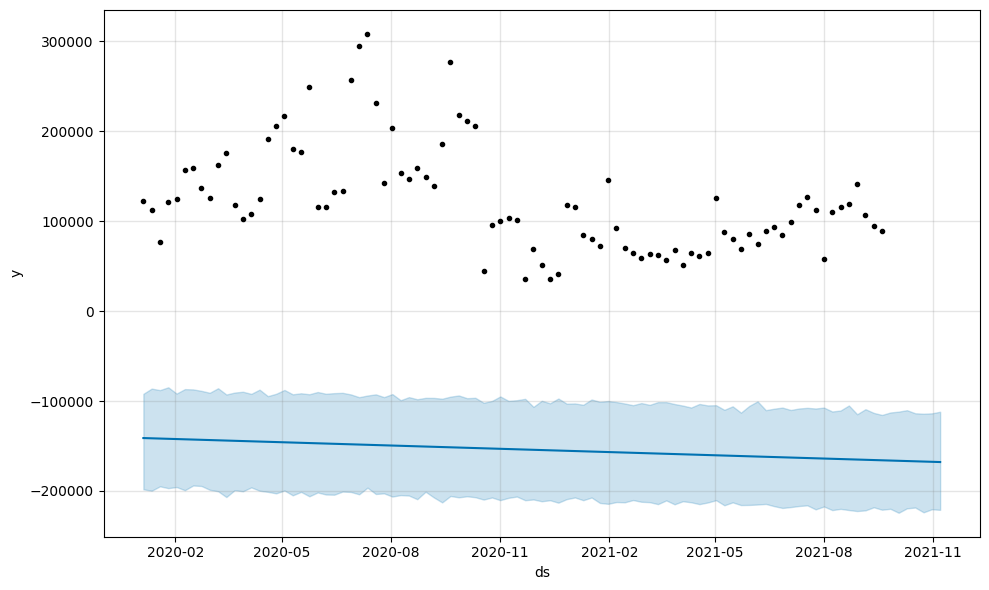

In [ ]:
m1.plot(forecast2);